# Derive interannual phenology metrics and thier drivers

In [2]:
black=(0,0,0)
lightblue= (112/255.0,160/255.0,205/255.0)
orange=(196/255.0,121/255.0,0)
grey=(178/255.0,178/255.0,178/255.0)
darkblue=(0,52/255.0,102/255.0)
darkgreen=(0,79/255.,0)

black_shade = (128/255.0,128/255.0, 128/255.0)
lightblue_shade = (91/255.0, 174/255.0,178/255.0)
orange_shade = (204/255.0,174/255.0,113/255.0)
grey_shade = (191/255.0,191/255.0,191/255.0)
darkblue_shade = (67/255.0,147/255.0,195/255.0)
darkgreen_shade =(223/255.0, 237/255.0,195/255.0)

In [7]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rootdir = '/Users/XNUNEI/Documents/science/roammiz/southern-ocean-siz-seasonality'

In [435]:
# first get the satelite chl-a data

# # Concatenate chl- a data into one files

ds = xr.open_dataset(rootdir+'/data/oc-cci/CCI_ALL-v5.0-8DAY(6).nc')
# print(ds.time[-1])
ds2 = xr.open_dataset(rootdir+'/data/oc-cci/CCI_ALL-v5.0-8DAY(9).nc')
# print(ds2.time[0])
ds3 = xr.open_dataset(rootdir+'/data/oc-cci/CCI_ALL-v5.0-8DAY(8).nc')
# print(ds3.time[0])


sat=xr.concat([ds2,ds,ds3],dim='time')
ds3 = sat.sel(lat=slice(-59,-61),lon=slice(-2.5,5)).mean(dim='lat').mean(dim='lon')
satchl=ds3

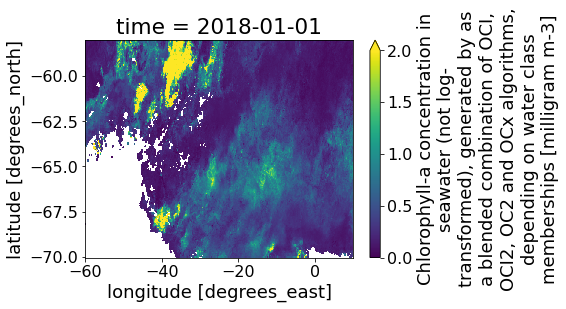

In [2841]:
satchl.chlor_a[79,:,:].plot(vmin=0,vmax=2)

In [84]:
icethick = xr.open_dataset('../results/data/sea_ice_thickness2.nc')

In [85]:
icethick.resample(date='Y').sum().thickness.shape

(10, 11, 70)

<ipython-input-86-b4388ddb7022>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(icethick.lon,icethick.lat,icethick.resample(date='Y').sum().thickness[1,:,:]/1e6)


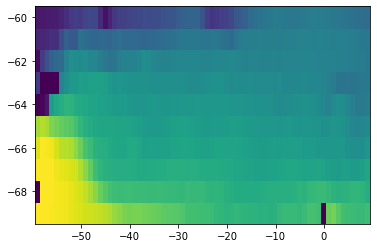

In [86]:
plt.pcolormesh(icethick.lon,icethick.lat,icethick.resample(date='Y').sum().thickness[1,:,:]/1e6)

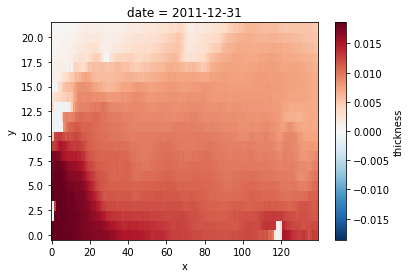

In [16]:
(icethick.resample(date='Y').sum().thickness[1,:,:]/1e6).plot()

In [51]:
#alternative chl-max calculation

satchl = xr.open_dataset('../data/CCI_ALL-v5.0-MONTHLY.nc')
import xesmf as xe

ds_out = xe.util.grid_2d(-60,10,1,-70,-59,1)


regridder = xe.Regridder(satchl, ds_out, 'bilinear')
chl_out = regridder(satchl.chlor_a)

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [52]:
chl_out['lon']=ds_out.lon
chl_out['lat']=ds_out.lat

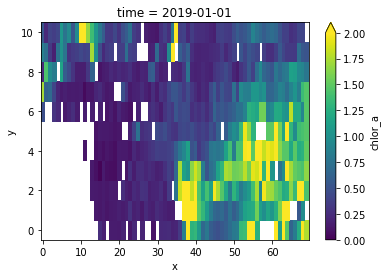

In [53]:
chl_out[91,:,:].plot(vmin=0,vmax=2)

In [442]:
import numpy as np
# use a different method

max_magnitude_all=np.zeros([9,70,11])
# duration = np.ndarray(9)
# int_chl=np.ndarray(9)

for i,year in enumerate(np.arange(2011,2020)):
    for j in range(len(chl_out.x[:70])):
        for k in range(len(chl_out.y[:11])):
            
            midyear_start = '{}-06-01'.format(year)
            midyear_end = '{}-05-01'.format(year+1)
            chlds=chl_out.sel(time=slice(midyear_start,midyear_end)).isel(x=j,y=k)
            chlds=chlds.interpolate_na(dim='time')  # deal with nans

            maxchl = chlds.max()

            max_magnitude_all[i,j,k]=maxchl


In [443]:
max_magnitude_all= max_magnitude_all.transpose(0,2,1)

In [445]:
iceind=(icethick.resample(date='Y').sum().thickness)[1:,:,:]

In [202]:
pvalue_ice_chl.shape

(11, 70)

<ipython-input-350-803db3cdb8fe>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,regression_ice_chl,cmap=plt.cm.RdBu_r,vmin=-1,vmax=1, shading='flat')
<ipython-input-350-803db3cdb8fe>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,np.where(pvalue_ice_chl<0.1,1,np.nan),hatch='/',alpha=0.5, cmap=plt.cm.Greys_r,shading='flat')


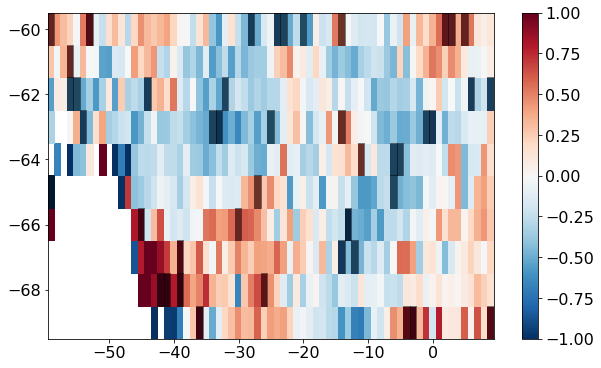

In [350]:



plt.figure(figsize=[10,6])
xx,yy = np.meshgrid(icethick.lon[1,:],icethick.lat[:,1])
# xx,yy = np.meshgrid(np.arange(1,71),np.arange(1,12))
plt.pcolormesh(xx,yy,regression_ice_chl,cmap=plt.cm.RdBu_r,vmin=-1,vmax=1, shading='flat')
plt.colorbar()
# plt.scatter(xx,yy,c=np.where(pvalue_ice_chl<0.1,1,np.nan),marker='*',alpha=0.9, cmap=plt.cm.Greys_r)
plt.pcolormesh(xx,yy,np.where(pvalue_ice_chl<0.1,1,np.nan),hatch='/',alpha=0.5, cmap=plt.cm.Greys_r,shading='flat')

# plt.ylim(-69,-59)

(-63.0, -59.0)

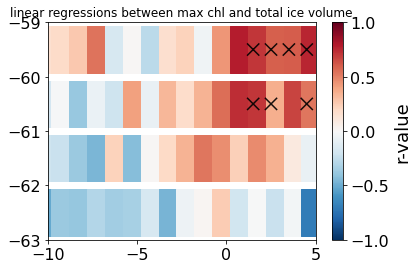

In [495]:
plt.title('linear regressions between max chl and total ice volume',fontsize=12)
plt.scatter(xx,yy,c=regression_ice_chl,s=2150,marker='s',cmap=plt.cm.RdBu_r)
cbar=plt.colorbar()
cbar.set_label('r-value')
plt.scatter(xx,yy,c=np.where(pvalue_ice_chl<0.1,1,np.nan),marker='x',alpha=0.9,s=150,cmap=plt.cm.Greys_r)
plt.xlim(-10,5)
plt.ylim(-63,-59)

0.8989312166962516
0.000977759274079372


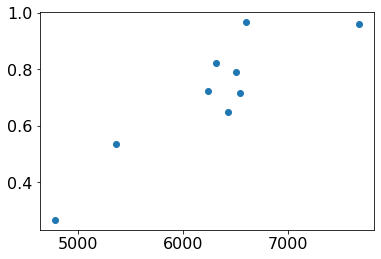

0.868883021070939
0.0023585370379068447


Text(0.5, 0, 'Total Ice Volume')

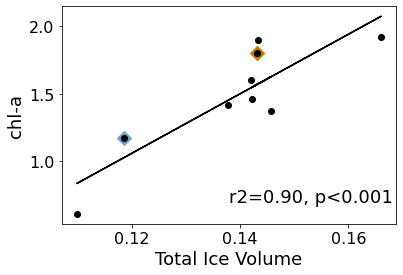

In [524]:
fig=plt.figure()
ax=fig.add_subplot()

from sklearn.linear_model import LinearRegression
X = iceind[:,-3:,-12:-5].values.sum(1).sum(1)/1e6
Y = max_magnitude_all[:,-3:,-12:-5].mean(1).mean(1)*2
mask = ~np.isnan(X)&~np.isnan(Y)
X= X[mask]
Y= Y[mask]
#         print(X)

ax.scatter(X[-1],Y[-1],s=100,color=orange,marker='D')
ax.scatter(X[-2],Y[-2],s=100,color=lightblue,marker='D')
ax.scatter(X,Y,c='k')

print(pearsonr(X,Y)[0])
print(pearsonr(X,Y)[1])

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


ax.plot(X,Y_pred,c='k')

ax.text(0.5,0.1,'r2=0.90, p<0.001',transform=ax.transAxes)

ax.set_ylabel('chl-a')
ax.set_xlabel('Total Ice Volume')

In [ ]:
subset_chlmax 

/opt/anaconda3/envs/data/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


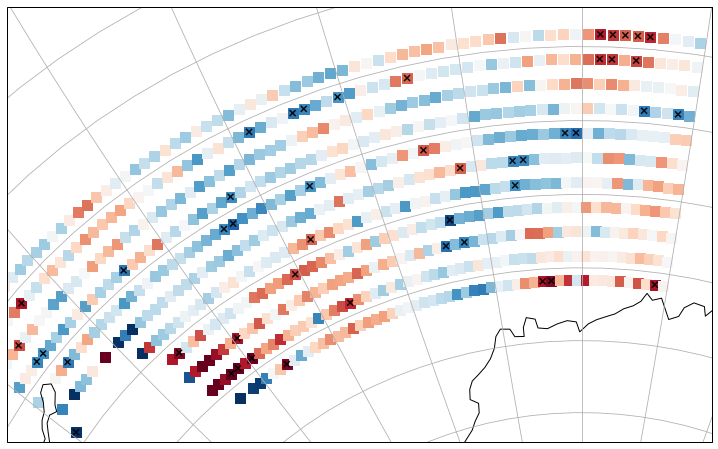

In [450]:
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib 
import matplotlib.colors as colors
import seaborn as sns
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})
central_lon, central_lat = 0, -60
fig = plt.figure(figsize=(18,8))
# projection = ccrs.Orthographic(central_lon, central_lat)
# fig, ax = plt.subplots(subplot_kw={'projection': projection})
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
# ax = plt.axes(projection=ccrs.PlateCarree())

# ax = plt.axes(projection=ccrs.SouthPolarStereo(central_lon, central_lat))

ax.coastlines()
ax.gridlines()

extent = [-50, 10, -58, -70]
ax.set_extent(extent)


# gl = ax.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False

xx,yy = np.meshgrid(icethick.lon[1,:],icethick.lat[:,1])
# print(xx)
# xx,yy = np.meshgrid(np.arange(1,71),np.arange(1,12))
# plt.colorbar()
# plt.pcolormesh(xx,yy,np.where(pvalue_ice_chl<0.1,1,np.nan),hatch='/',alpha=0.5, cmap=plt.cm.Greys_r,shading='flat')
ax.scatter(xx,yy,c=regression_ice_chl,s=100,marker='s',cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())
ax.scatter(xx,yy,c=np.where(pvalue_ice_chl<0.1,1,np.nan),marker='x',alpha=0.9, cmap=plt.cm.Greys_r,transform=ccrs.PlateCarree())



In [167]:
regression_ice_chl = np.zeros([11,70])


In [449]:
from scipy.stats import pearsonr
regression_ice_chl = np.zeros([11,70])
pvalue_ice_chl = np.zeros([11,70])


for j in range(11):
    for k in range(70):
        X = iceind[:,j,k].values
        Y = max_magnitude_all[:,j,k]
        mask = ~np.isnan(X)&~np.isnan(Y)
        X= X[mask]
        Y= Y[mask]
#         print(X)
        
        try:
            regression_ice_chl[j,k] =  pearsonr(X,Y)[0]
            pvalue_ice_chl[j,k] =  pearsonr(X,Y)[1]

# #             print(pearsonr(X,Y)[0]**2)
        except: 
            regression_ice_chl[j,k] = np.nan
            pvalue_ice_chl[j,k] = np.nan
        
        
#         plt.figure()
#         plt.scatter(iceind[:,j,k],max_magnitude[:,j,k])
        
    

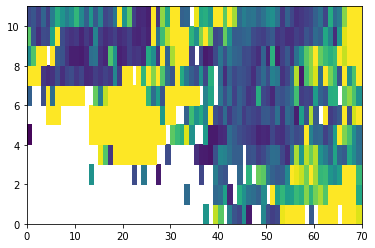

In [180]:
plt.pcolormesh(max_magnitude[0,:,:],vmin=0,vmax=2)

In [7]:
satchl = xr.open_dataset('../build/chlbox.nc')

In [475]:
# load argo floats
# Load argo data
argo1mld = xr.open_dataset(rootdir+'/results/processed_data/argo_5904397_mld.nc')
argo1 = xr.open_dataset(rootdir+'/results/processed_data/argo_5904397.nc')
argo1['schl']=argo1.chla[:60,:].mean(dim='depth')

argo2mld = xr.open_dataset(rootdir+'/results/processed_data/argo_5904467_mld.nc')
argo2 = xr.open_dataset(rootdir+'/results/processed_data/argo_5904467.nc')
argo2['schl']=argo2.chla[:60,:].mean(dim='depth')

mld1=argo1mld.resample(time='1Y').max(dim='time').mld[:-1]
mld2=argo2mld.resample(time='1Y').max(dim='time').mld[1:-1]
argo1=argo1.drop('lat').drop('lon')
argo2=argo2.drop('lat').drop('lon')

In [476]:
mld2

<xarray.DataArray 'mld' (time: 4)>
array([144., 134., 120., 132.])
Coordinates:
  * time     (time) datetime64[ns] 2015-12-31 2016-12-31 2017-12-31 2018-12-31

In [ ]:
midyear_start='1997-06-30'
midyear_end='2020-06-30'

# midyear_start='2015-05-30'
# midyear_end='2020-05-20'

chl_sat_dataset=satchl.sel(time=slice(midyear_start,midyear_end))
# chl_sat_dataset = argo1.sel(time=slice(midyear_start,midyear_end))

<ipython-input-436-bcd32d66144d>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(figsize=[15,5])


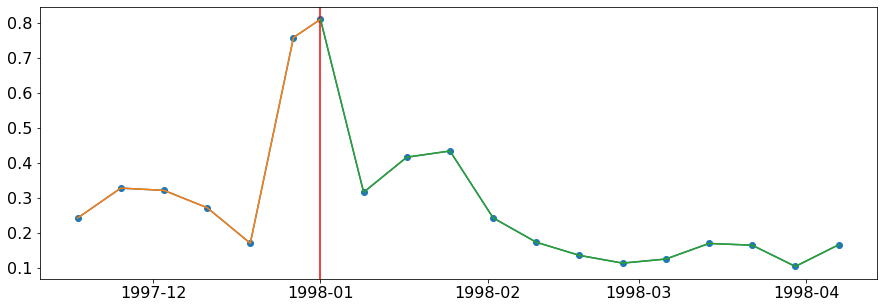

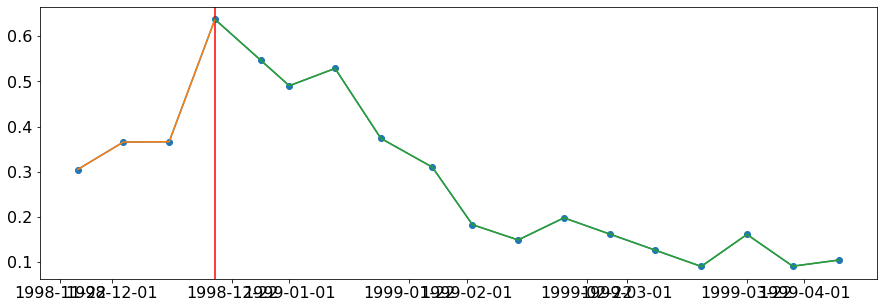

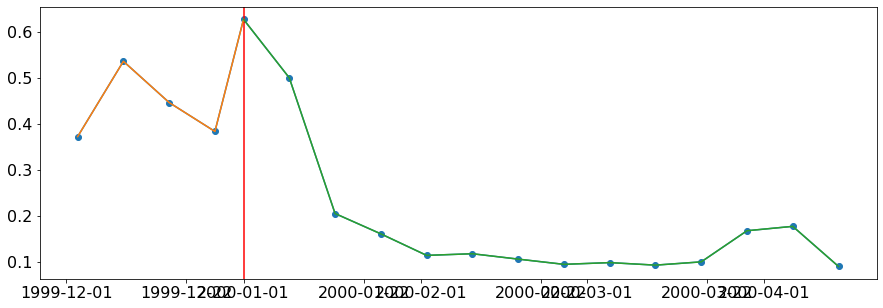

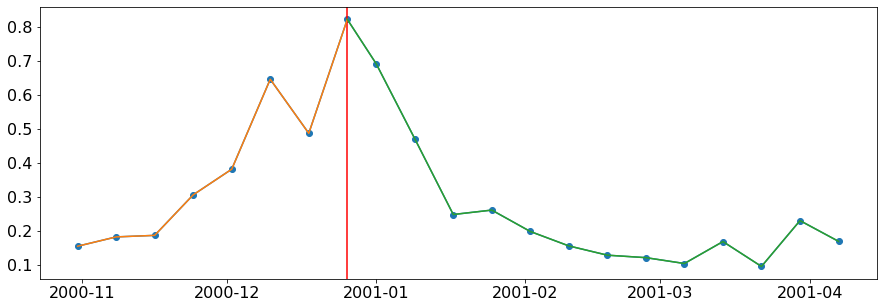

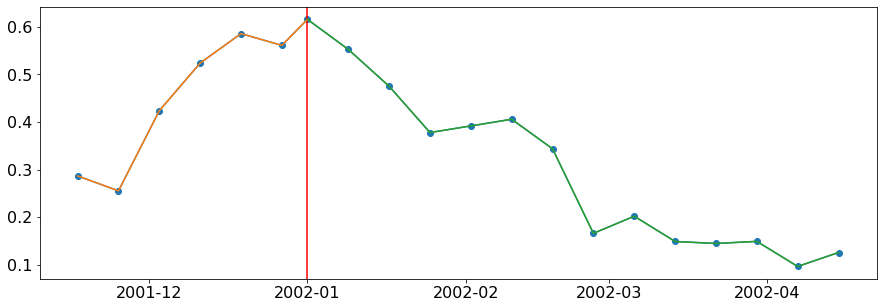

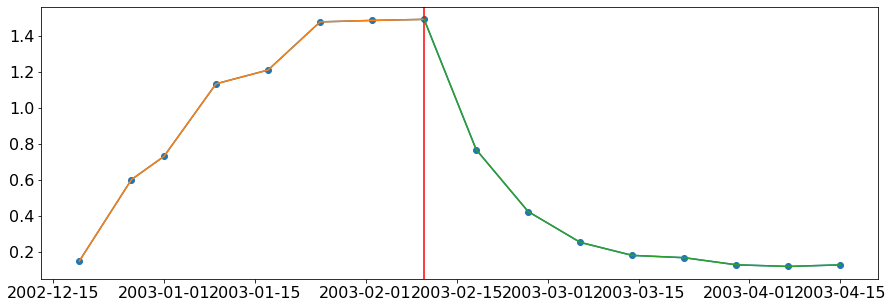

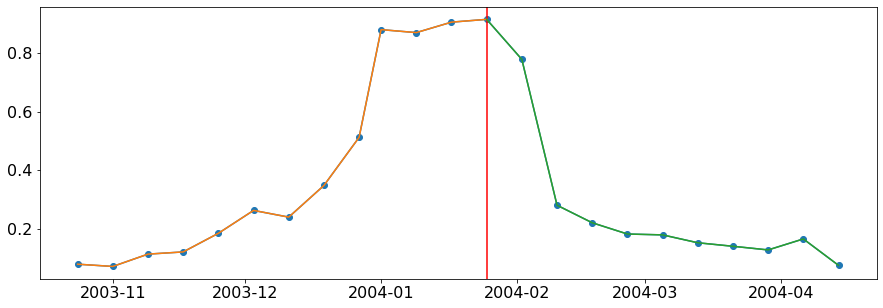

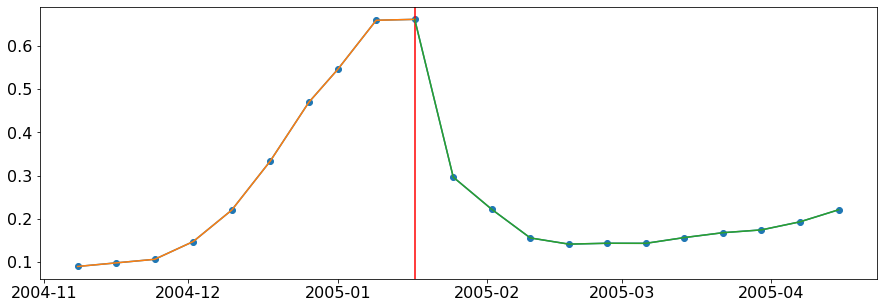

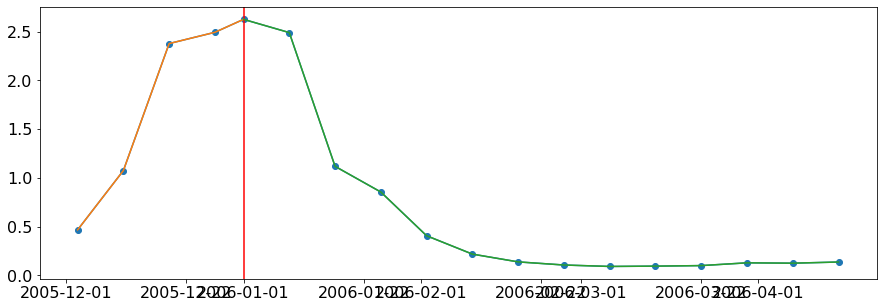

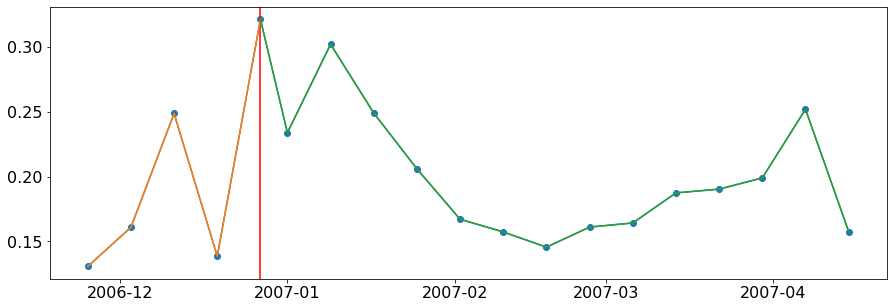

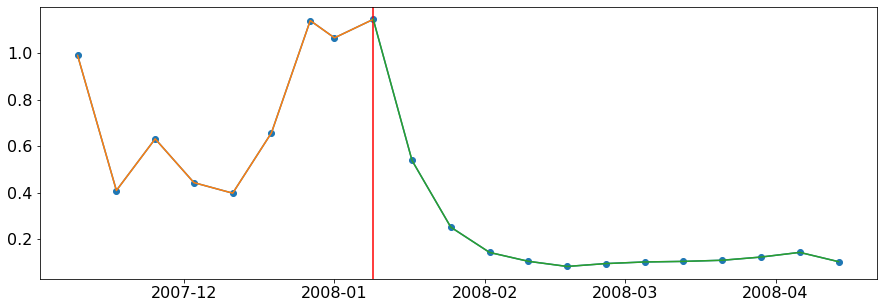

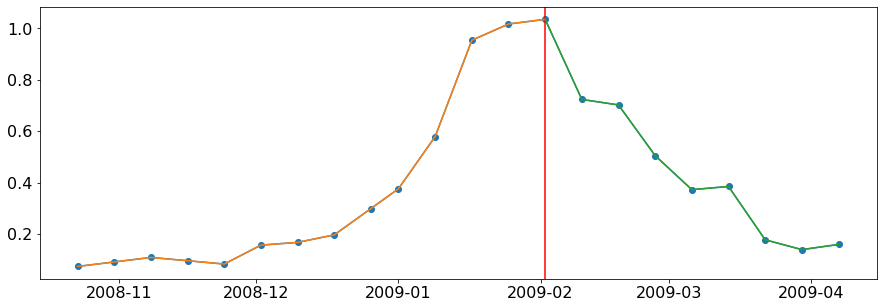

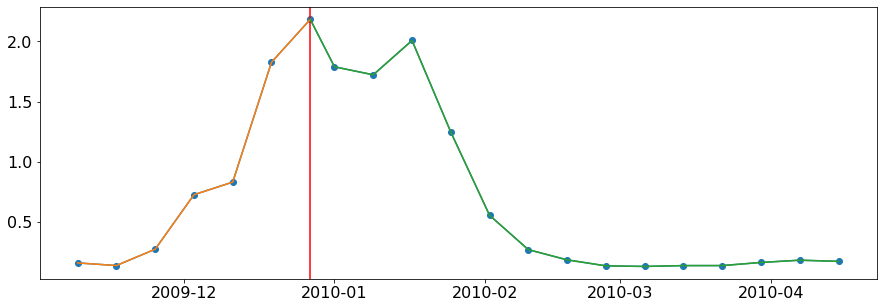

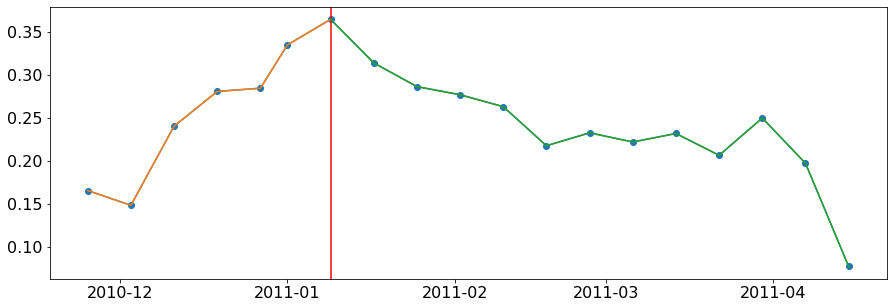

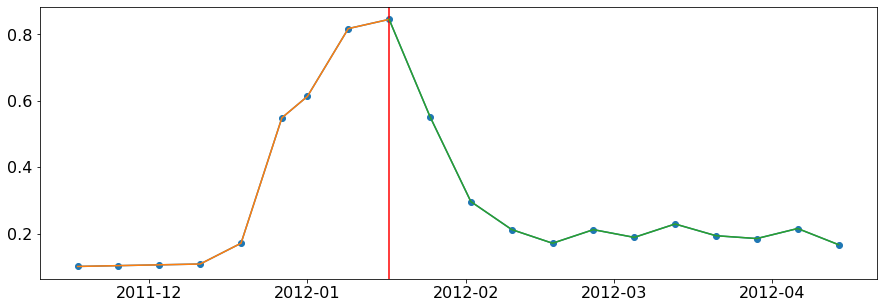

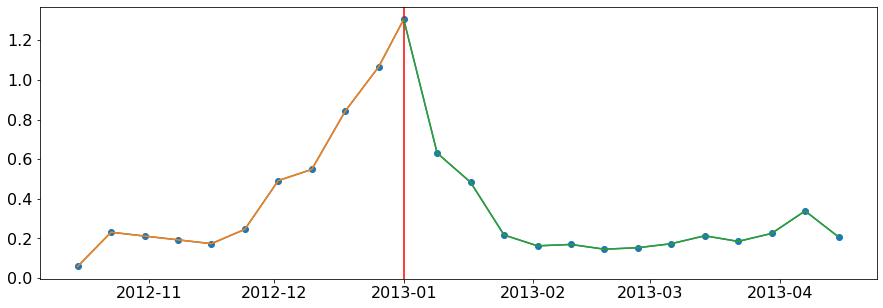

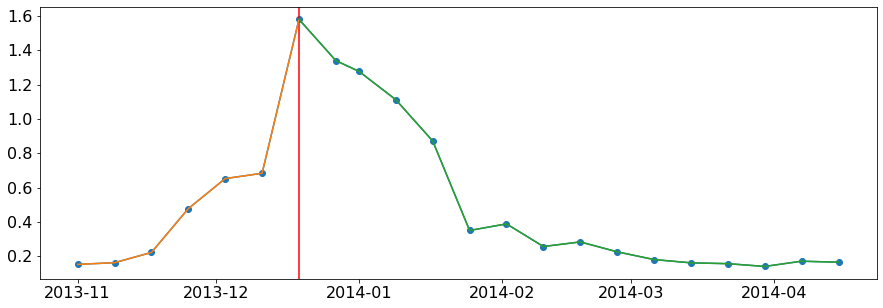

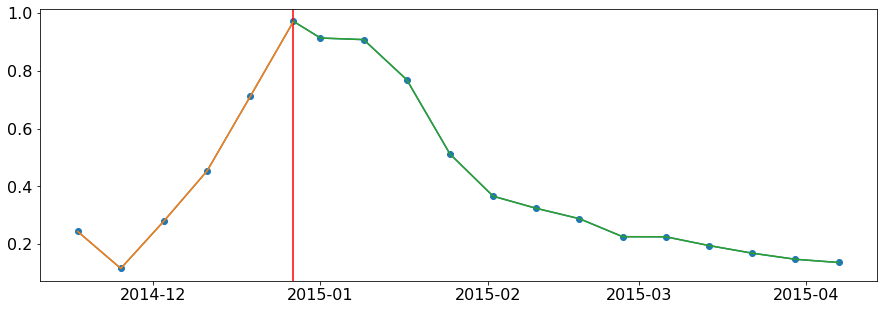

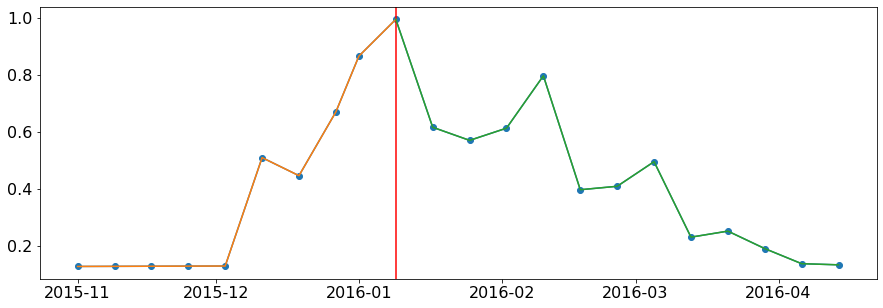

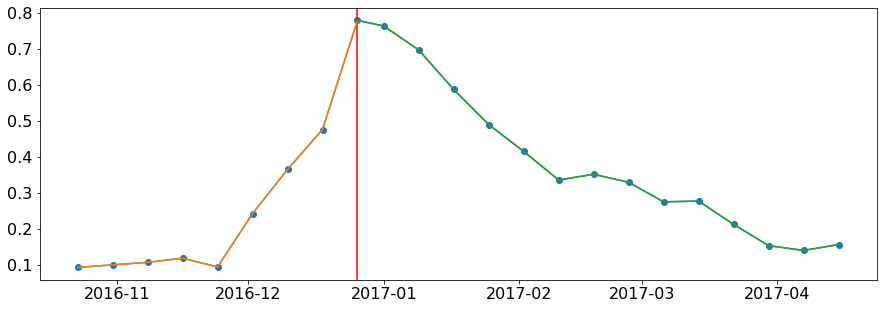

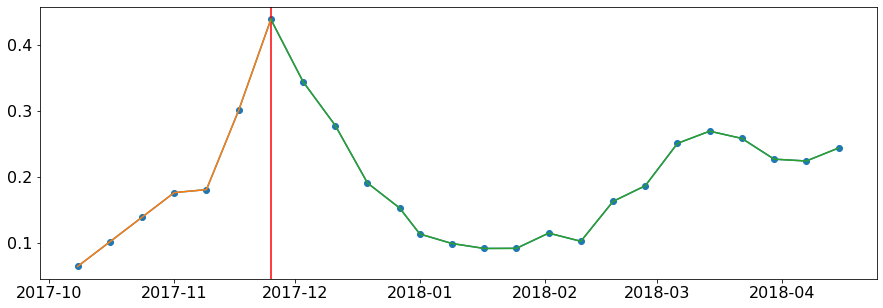

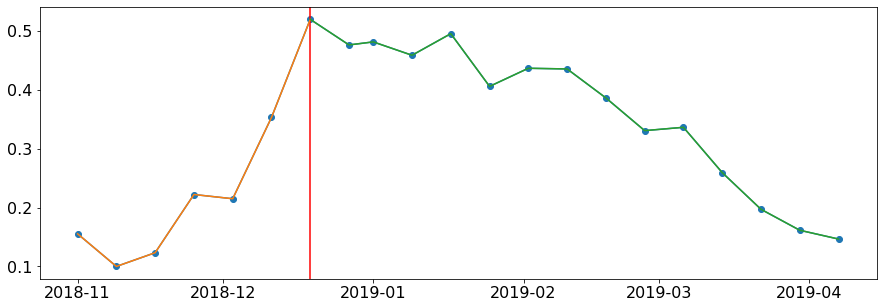

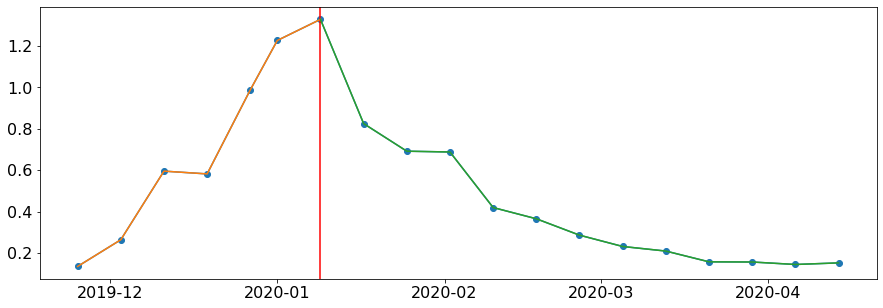

In [436]:

# use a different method

max_magnitude_lr=np.ndarray(23)
duration = np.ndarray(23)
int_chl=np.ndarray(23)

for i,year in enumerate(np.arange(1997,2020)):
    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    chlds=satchl.sel(time=slice(midyear_start,midyear_end))
    chlds=chlds.interpolate_na(dim='time')  # deal with nans
    chlds=chlds.dropna(dim='time')
    
    maxchl = chlds.chlor_a.max().values
#     apex = np.array(x.time[x.chlor_a==x.chlor_a.max()])
    apex_ind = np.array(([chlds.chlor_a==chlds.chlor_a.max()])).argmax()
#     prepeak_min = chlds.chlor_a[:apex_ind+1].min().values
#     postpeak_min = chlds.chlor_a[apex_ind:].min().values
#     prepeak_subset = chlds.isel(time=slice(0,apex_ind+1))
#     postpeak_subset = chlds.isel(time=slice(apex_ind,len(chlds.chlor_a)))
#     initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))].values[-1]
    
#     termination=postpeak_subset.time[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))].values[0]
#     length = (pd.Series(termination - initiation).dt.days)[0]

#     int_chl = np.nansum(x.iloc[initiation_ind:termination_ind].chlor_a)
    
    
    
    fig,ax=plt.subplots(figsize=[15,5])
    ax.plot(chlds.time,chlds.chlor_a,marker='o')
    ax.axvline(chlds.time[apex_ind].values,c='r')
    ax.plot(chlds.time[:apex_ind+1],chlds.chlor_a[:apex_ind+1])
    ax.plot(chlds.time[apex_ind:],chlds.chlor_a[apex_ind:])
#     ax.axhline(inithres,c='k')
#     ax.axhline(termthres,c='grey')
#     ax.axvline(initiation)
#     ax.axvline(termination)
#     ax.text(0.05,0.9,'{}'.format(length),transform=ax.transAxes)


    max_magnitude_lr[i]=maxchl
#     duration[i]=length
#     int_chl[i]=(prepeak_subset.chlor_a[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))[-1]:].sum()+
#                 postpeak_subset.chlor_a[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))[0]].sum())





# max_magnitude_outliers=np.array(max_magnitude)

In [2300]:
int_chl=np.array(int_chl)

In [11]:
copy  = xr.open_dataset(rootdir+'/src/satelite_analysis/seaice_subset5.nc')
ice_melt=np.ndarray(24)

for i,year in enumerate(np.arange(1997,2020)):
    year_start = '{}-01-01'.format(year)
    year_end = '{}-11-30'.format(year)
    si_ds=copy.sel(time=slice(year_start,year_end)).sel(longitude=slice(-5,5),latitude=slice(-62,-59)).mean(dim='longitude').mean(dim='latitude')
    si_ds=si_ds.interpolate_na(dim='time')  # deal with nans
    si_ds=si_ds.dropna(dim='time')
    
    x=si_ds.to_dataframe()
#     print(x)
    diffc = x.ice_conc.rolling(20).mean().diff()
    iterations=np.convolve(diffc < 0, np.ones(2), 'same') ==1
#     plt.figure()
#     plt.plot(x.index,diffc)
#     plt.plot(x.index,iterations)
#     plt.axvline(x.index[iterations][-2],c='k')
    
#     plt.twinx()
#     plt.plot(x.index,x.ice_conc,c='grey')
# #     plt.axvline(x.index[(iterations==1)[0]])

#     print(x.index[iterations][-1].dayofyear)
    ice_melt[i]=(x.index[iterations][-2].dayofyear)
    
    
ice_melt_outliers = np.array(ice_melt)

In [176]:
si_ds

<xarray.Dataset>
Dimensions:   (time: 8402)
Coordinates:
  * time      (time) datetime64[ns] 1997-03-30T12:00:00 ... 2020-03-31T12:00:00
Data variables:
    ice_conc  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [1782]:
# ice melt alternative

copy  = xr.open_dataset(rootdir+'/src/satelite_analysis/seaice_subset5.nc')
si_ds=copy.sel(longitude=slice(-10,5),latitude=slice(-63,-59)).median(dim='longitude').median(dim='latitude')



# ice_melt_day=np.ndarray(20)

# for i,year in enumerate(np.arange(2000,2020)):

#     midyear_start = '{}-06-01'.format(year)
#     midyear_end = '{}-05-30'.format(year+1)
#     iceds=si_ds.sel(time=slice(midyear_start,midyear_end))
#     iceds=iceds.ice_conc.rolling(time=7).mean()  # apply rolling window
#     max_ice = iceds.max().values
#     max_ind = np.array(([iceds==max_ice])).argmax()
# #     print(min_ind)
#     prepeak_max = iceds[:max_ind+1].max().values
#     postpeak_max = iceds[max_ind:].max().values
#     prepeak_subset = iceds.isel(time=slice(0,max_ind+1))
#     postpeak_subset = iceds.isel(time=slice(max_ind,len(iceds)))
# #     initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))].values[-1]
#     try:
#         termination=postpeak_subset.time[(postpeak_subset.values>postpeak_min+(0.7*(max_ice-postpeak_min)))].values[-1]
# #         print(termination)
# #         print()
#         ice_melt_day[i]=(pd.Series(termination).dt.dayofyear[0])


#         fig,ax=plt.subplots(figsize=[15,5])
#         ax.plot(iceds.time,iceds,marker='o')
#         ax.axvline(iceds.time[max_ind].values,c='r')
#         ax.axvline(termination,c='k')
#     except:
#         continue

<ipython-input-2658-8e2f8c2ad232>:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(figsize=[15,5])


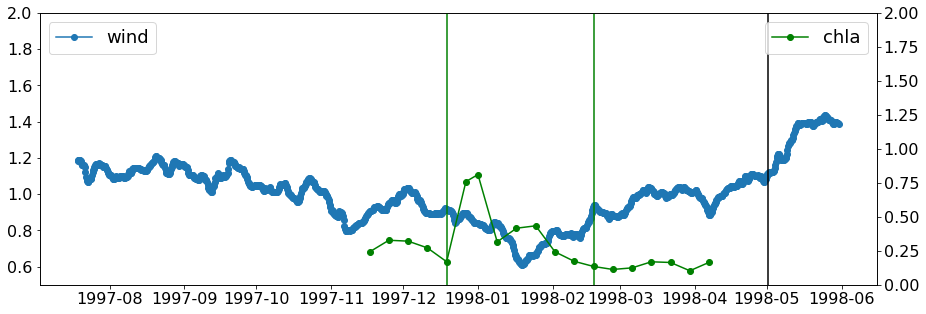

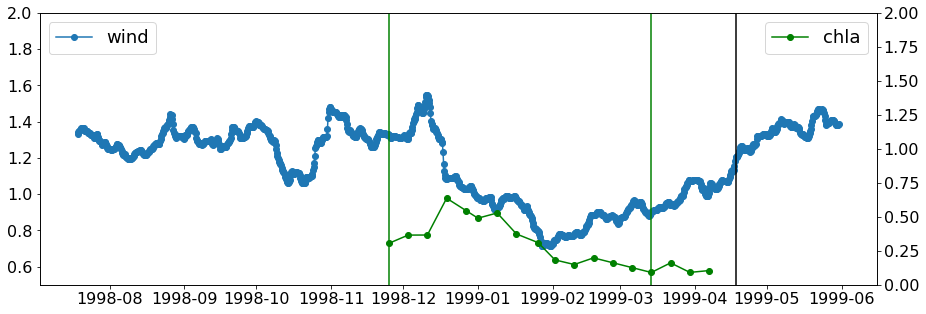

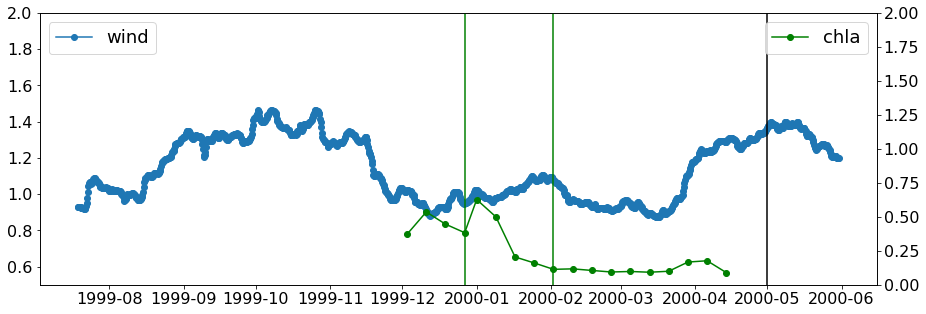

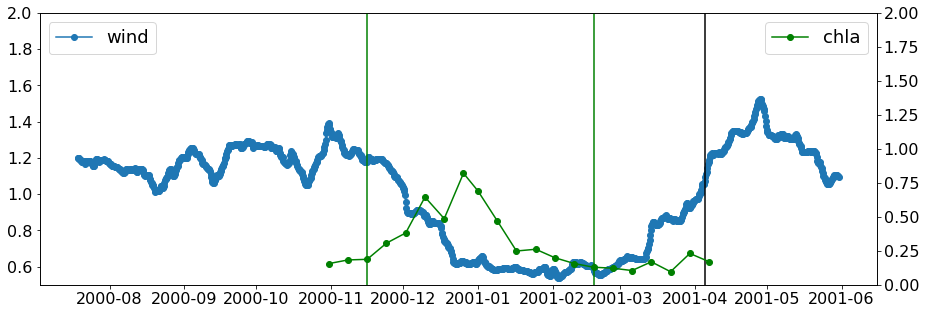

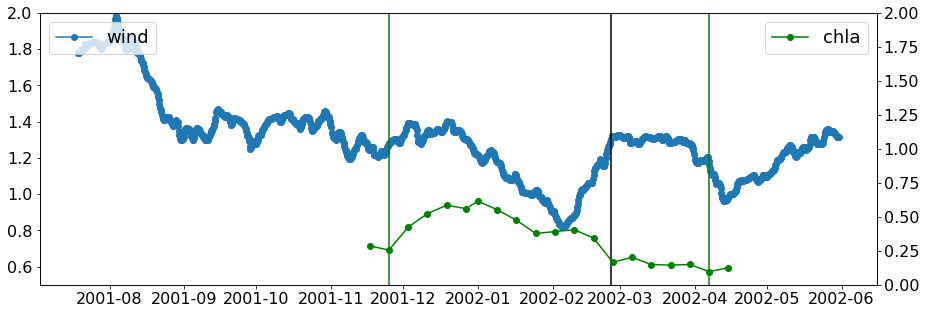

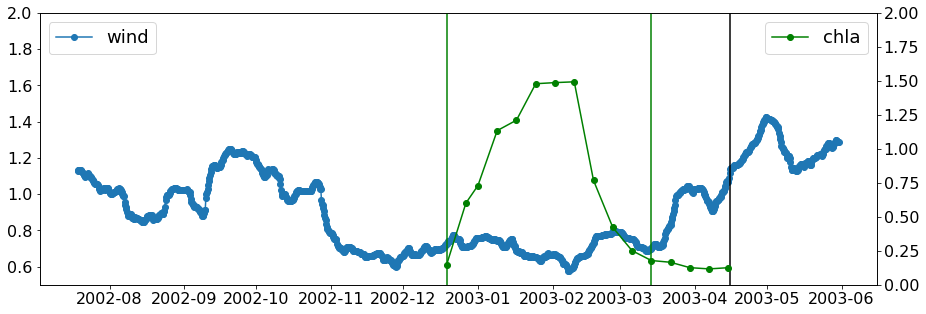

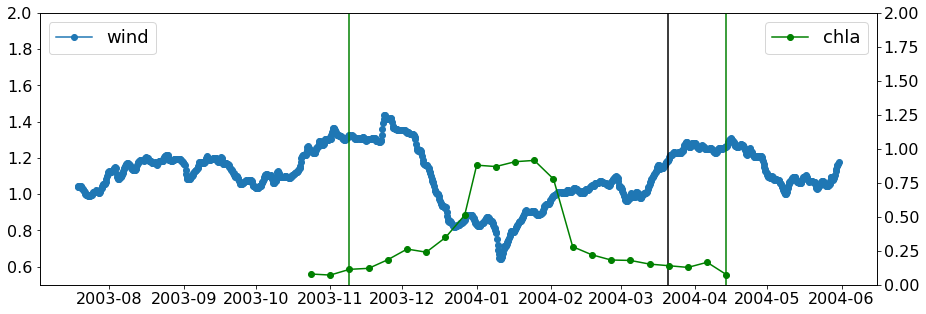

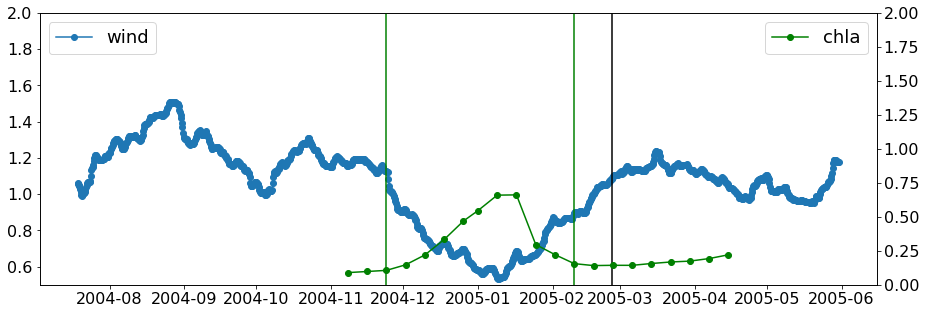

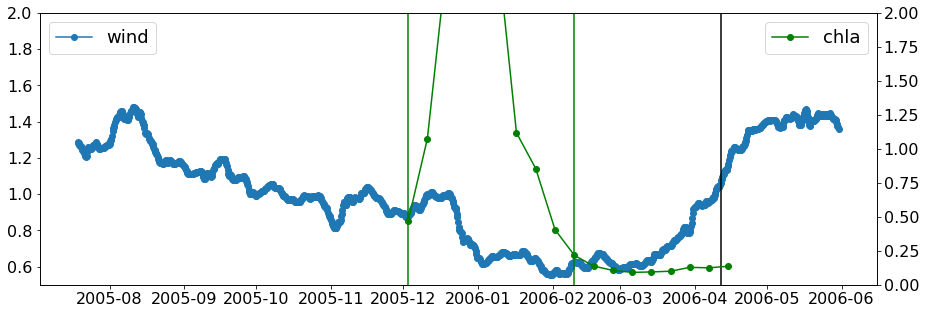

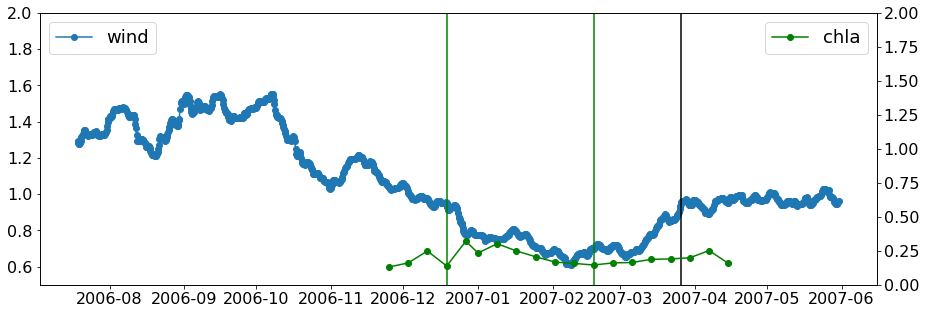

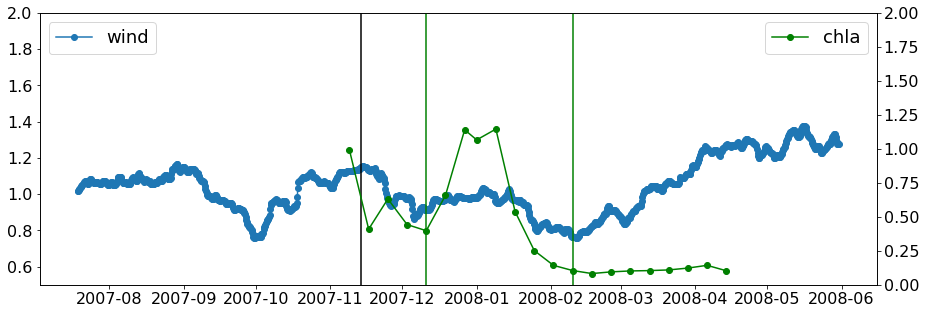

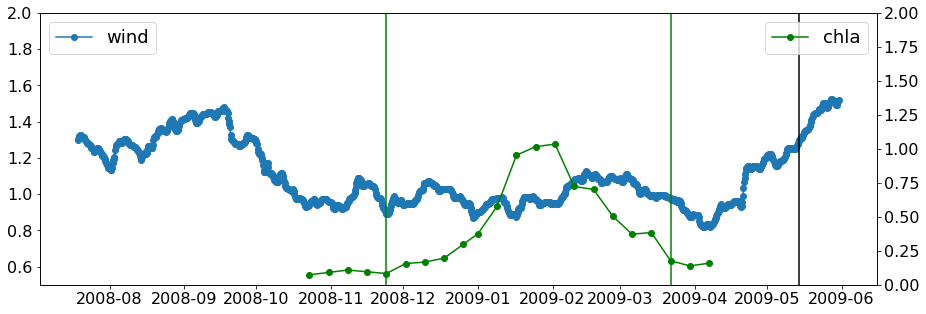

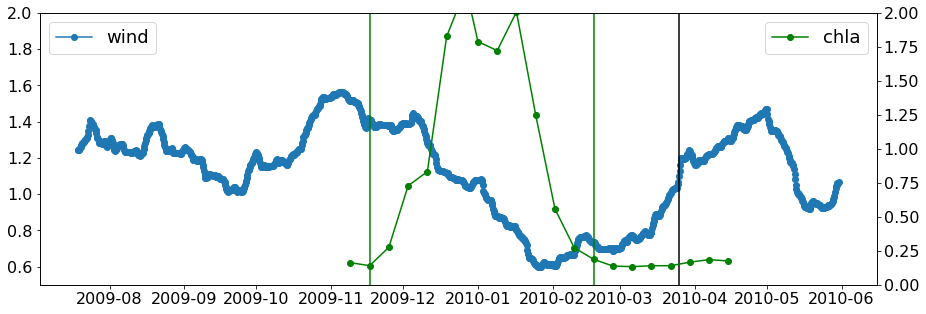

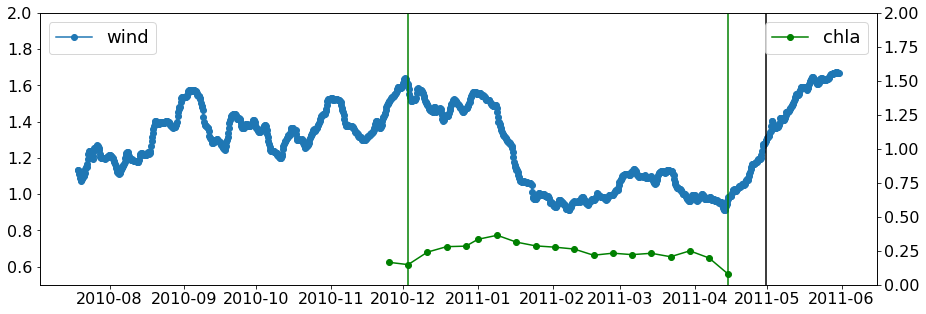

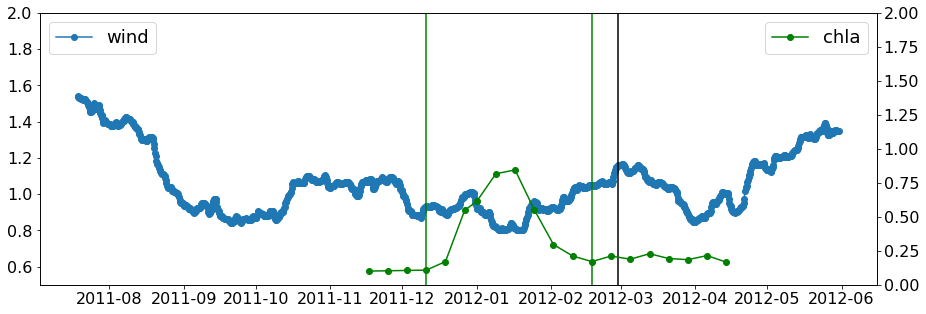

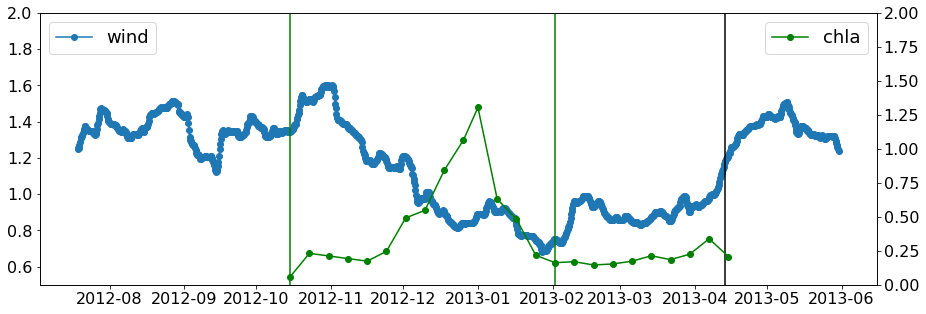

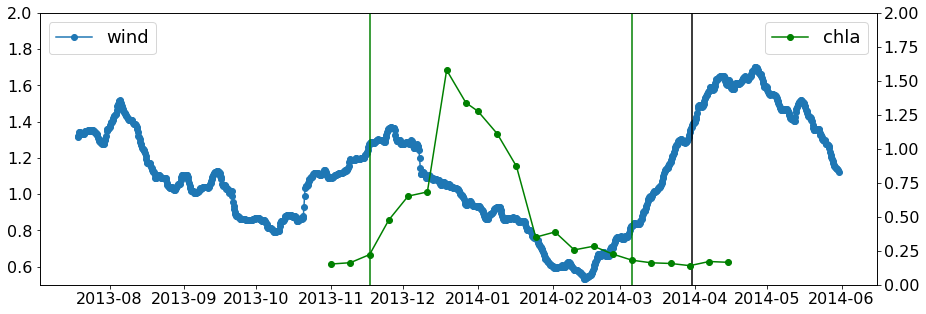

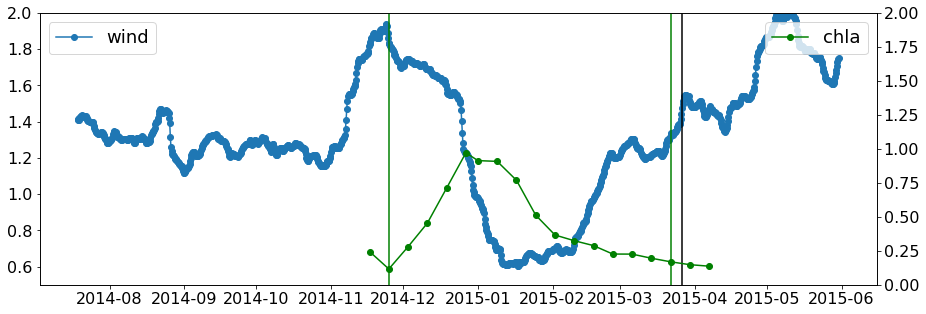

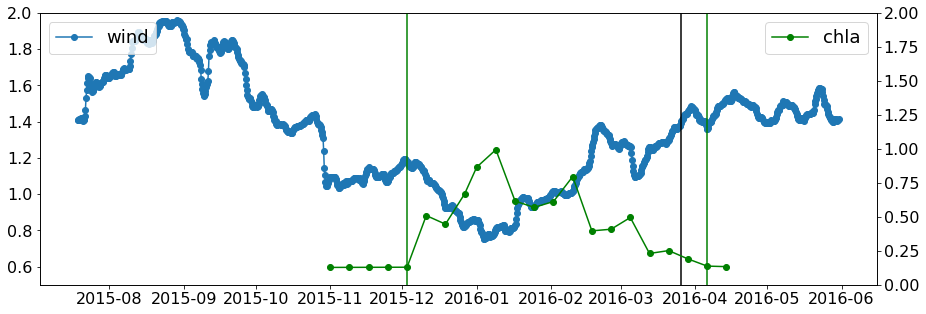

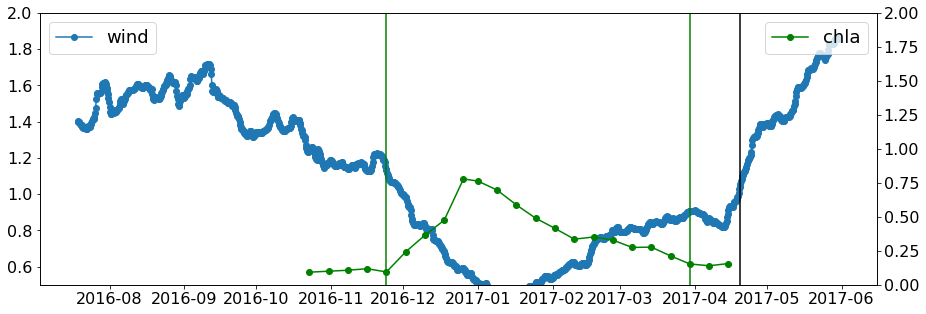

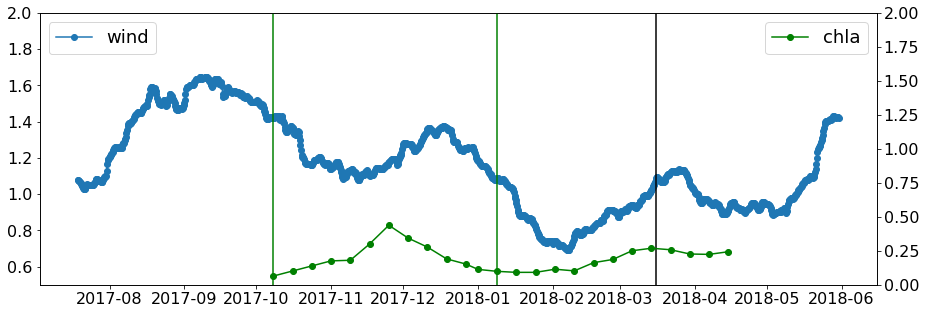

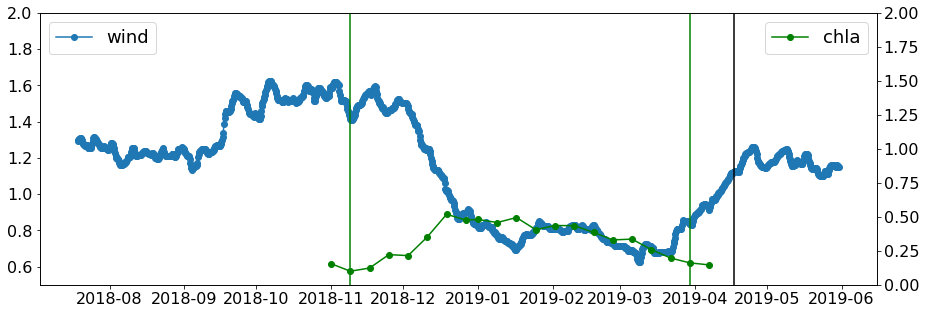

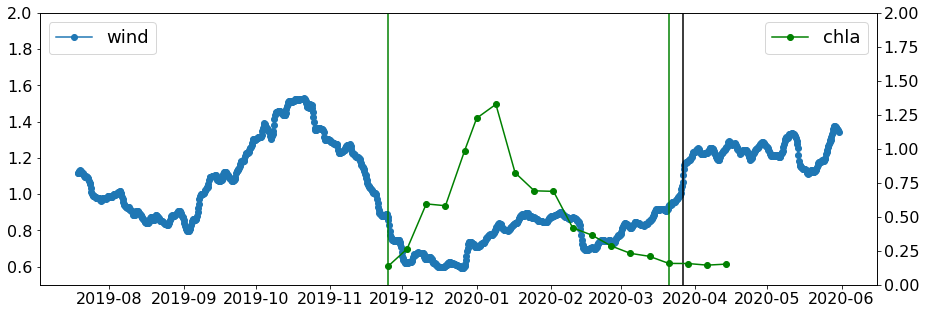

In [2658]:
# process wind data
# ds1 = xr.open_dataset(rootdir+'/data/era5/era5_subset1.nc')
# ds = xr.open_dataset(rootdir+'/data/era5/era5_subset.nc')

# ds2= xr.concat([ds1,ds],dim='time')
ds2 = xr.open_dataset('../data/era5_winds.nc')
era = ds2.sel(longitude=slice(-2.5,5),latitude=slice(-59,-61)).mean(dim='longitude').mean(dim='latitude')

def cart2pol(x, y):
    import numpy as np
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def calc_wind(u10_wind,v10_wind):

    import airsea
    from metpy.calc import wind_direction
    import numpy as np
    tau_x=airsea.windstress.stress(u10_wind,z=10,drag='largepond',rho_air=1.22,Ta=10.)
    tau_y=airsea.windstress.stress(v10_wind,z=10,drag='largepond',rho_air=1.22,Ta=10.)


    tx = np.where(u10_wind>0,tau_x,tau_x*-1)  # Add directional signs back to wind stress vectors
    ty = np.where(v10_wind>0,tau_y,tau_y*-1)

    tau = np.sqrt(tx**2+ty**2)

    [tau2,theta]=cart2pol(u10_wind,v10_wind)   #to get winds oriented 0 for Easterly. 
    wind_dir=np.rad2deg(theta)

    return tau, tx, ty, wind_dir
tau,tx,ty,wdir=calc_wind(era.u10,era.v10)
era['tau']=xr.DataArray(data=tau,coords=[era.time], dims=['time'])

copy  = xr.open_dataset(rootdir+'/src/satelite_analysis/seaice_subset5.nc')
si_ds=copy.sel(longitude=slice(-2.5,5),latitude=slice(-61,-59)).mean(dim='longitude').mean(dim='latitude')

ds3 = sat.sel(lat=slice(-59,-61),lon=slice(-2.5,5)).mean(dim='lat').mean(dim='lon')
satchl=ds3


wind_increase_day = np.ndarray(23)
ice_melt_day=np.ndarray(23)


max_magnitude=np.ndarray(23)
duration = np.ndarray(23)
int_chl= np.ndarray(23)

bloom_start=np.ndarray(23)
bloom_end=np.ndarray(23)


for i,year in enumerate(np.arange(1997,2020)):
    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    erads=era.sel(time=slice(midyear_start,midyear_end))
    erads=erads.tau.rolling(time=24*8).mean()*10  # apply rolling window
# try weekly resample
#     erads=erads.tau.resample(time='8D').mean()*10

    min_wind = erads.min().values
    min_ind = np.array(([erads==min_wind])).argmax()

#     prepeak_max = erads[:min_ind+1].max().values
#     postpeak_max = erads[min_ind:].max().values
    prepeak_subset = erads.isel(time=slice(0,min_ind+1))
    postpeak_subset = erads.isel(time=slice(min_ind,len(erads)))
#     print(postpeak_subset)
#     termination=postpeak_subset.time[(postpeak_subset.values>min_wind+0.5*(postpeak_max-min_wind))].values[0]
    try:
#         termination=postpeak_subset.time[(postpeak_subset.values>(postpeak_subset.min().values+0.2*(postpeak_subset.max().values- postpeak_subset.min().values)))].values[0]
        termination=postpeak_subset.time[postpeak_subset.values>(1.1*(postpeak_subset.mean().values))].values[0]

    except: continue

#     max_chl_wind = postpeak_subset.time[(postpeak_subset.values>(postpeak_subset.min().values+0.01*(postpeak_subset.max().values- postpeak_subset.min().values)))].values[0]
#     termination=postpeak_subset.time[(postpeak_subset.values<postpeak_max)].values[0]

    wind_increase_day[i]=(pd.Series(termination).dt.dayofyear[0])

#     wind_invert_day[i]=(pd.Series(max_chl_wind).dt.dayofyear[0])

    fig,ax=plt.subplots(figsize=[15,5])
    ax.plot(erads.time,erads,marker='o',c='tab:blue',label='wind')
#     ax.plot(prepeak_subset.time,prepeak_subset,marker='o',c='tab:blue')
#     ax.plot(postpeak_subset.time,postpeak_subset,marker='o',c=darkblue)

    ax.axvline(termination,c='k')
    ax.set_ylim(0.5,2)

#     ax.axvline(max_chl_wind,c='r')

    plt.legend(loc=2)

    
    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    chlds=satchl.sel(time=slice(midyear_start,midyear_end))
    chlds=chlds.interpolate_na(dim='time')  # deal with nans
    chlds=chlds.dropna(dim='time')
    
    maxchl = chlds.chlor_a.max().values
#     apex = np.array(x.time[x.chlor_a==x.chlor_a.max()])
    apex_ind = np.array(([chlds.chlor_a==chlds.chlor_a.max()])).argmax()
#     print(apex_ind)
    prepeak_min = chlds.chlor_a[:apex_ind+1].min().values
    postpeak_min = chlds.chlor_a[apex_ind:].min().values
    prepeak_subset = chlds.isel(time=slice(0,apex_ind+1))
    postpeak_subset = chlds.isel(time=slice(apex_ind,len(chlds.chlor_a)))
    try:
        initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+0.05*(maxchl-prepeak_min))].values[-1]
    except: continue

    try:
        termination=postpeak_subset.time[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))].values[0]
    except: continue
    length = (pd.Series(termination - initiation).dt.days)[0]

#     int_chl = np.nansum(x.iloc[initiation_ind:termination_ind].chlor_a)
    ax2=ax.twinx()
    
    
#     fig,ax=plt.subplots(figsize=[15,5])
    ax2.plot(chlds.time,chlds.chlor_a,marker='o',c='g',label='chla')
#     ax.axvline(chlds.time[apex_ind].values,c='r')
#     ax.plot(chlds.time[:apex_ind+1],chlds.chlor_a[:apex_ind+1])
#     ax.plot(chlds.time[apex_ind:],chlds.chlor_a[apex_ind:])
#     ax.axhline(inithres,c='k')
#     ax.axhline(termthres,c='grey')
    ax2.axvline(initiation,c='g')
    ax2.axvline(termination,c='g')
#     ax.text(0.05,0.9,'{}'.format(length),transform=ax.transAxes)
    plt.ylim(0,2)
    plt.legend(loc=1)
    bloom_end[i]=pd.Series(termination).dt.dayofyear
#     print(chlds.time[apex_ind])
#     max_chl[i]=(chlds.time[apex_ind]).dt.dayofyear
    
    max_magnitude[i]=maxchl
    duration[i]=length
    bloom_start[i]=pd.Series(initiation).dt.dayofyear[0]
    bloom_end[i]=pd.Series(termination).dt.dayofyear[0]
    int_chl[i]=(prepeak_subset.chlor_a[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))[-1]:].sum()+
                postpeak_subset.chlor_a[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))[0]].sum())




In [1981]:
bloom_end[bloom_end<20]=np.nan

/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.07901590614032261

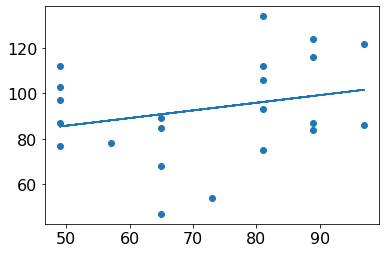

In [1982]:
plt.scatter( bloom_end,wind_increase_day)
Y=np.abs(wind_increase_day[:])
# X = np.array(dom[:-1])
X = np.array(
           bloom_end[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

plt.plot(X,Y_pred)
linear_regressor.score(X,Y)

In [2751]:
import airsea

# wind_threshold = (airsea.windstress.stress(5,z=10,drag='largepond',rho_air=1.22,Ta=10.))

<ipython-input-437-2296deae3ba2>:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(figsize=[15,5])


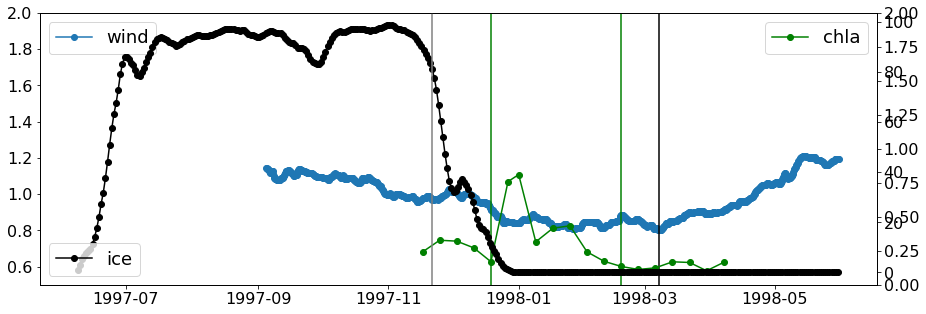

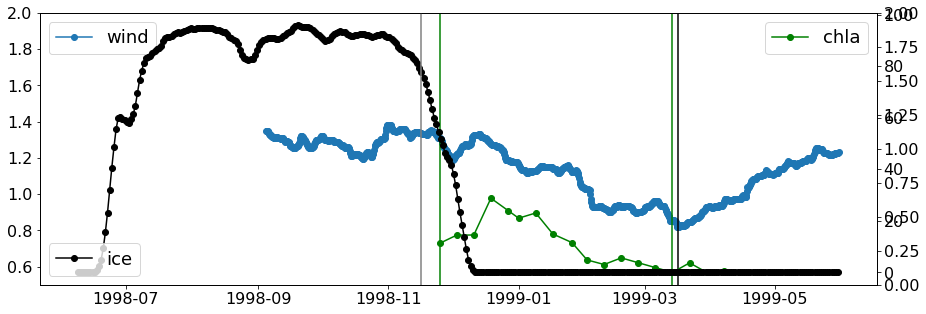

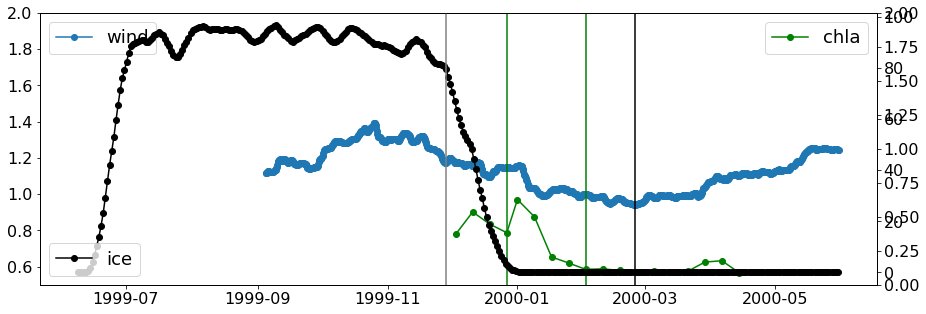

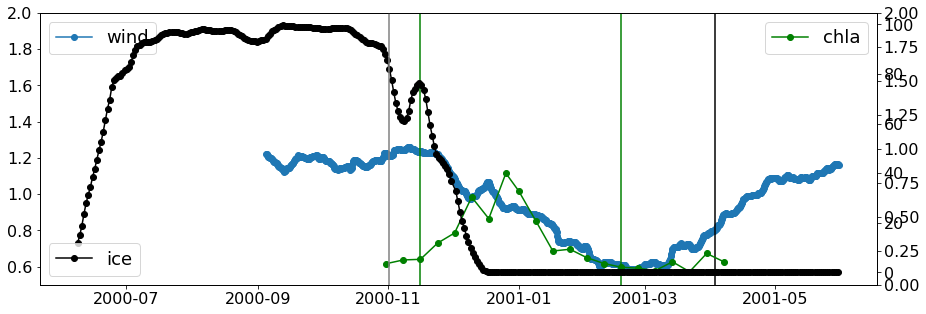

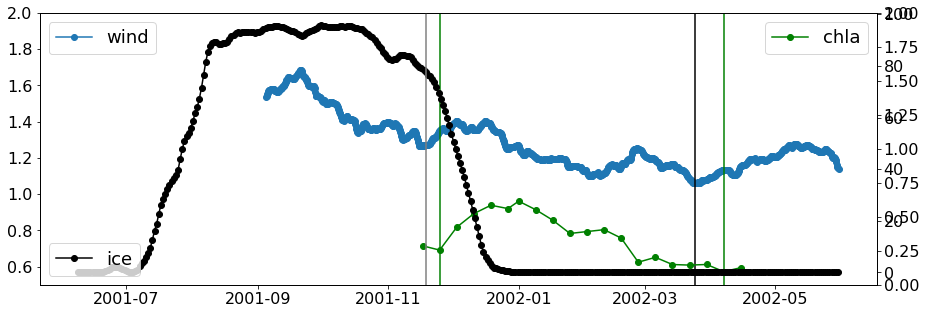

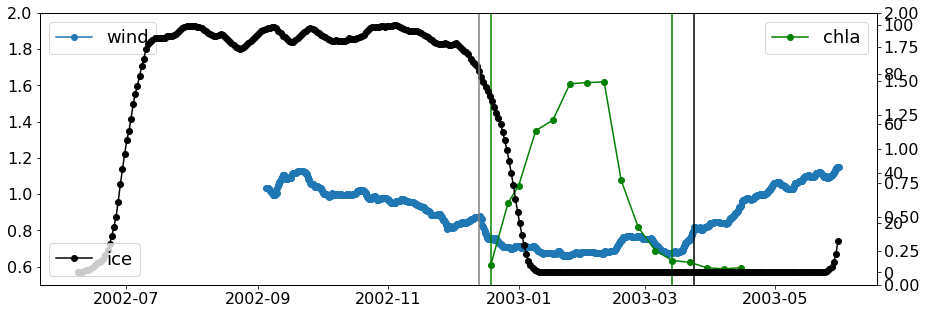

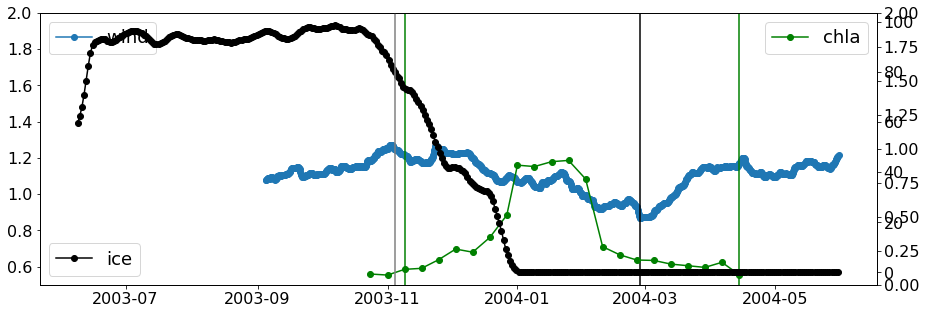

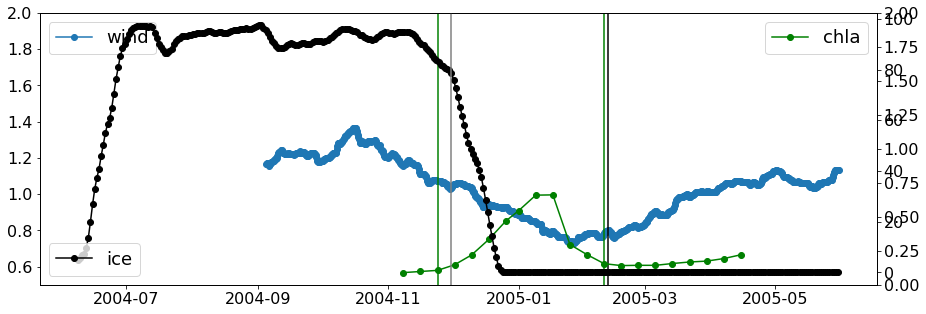

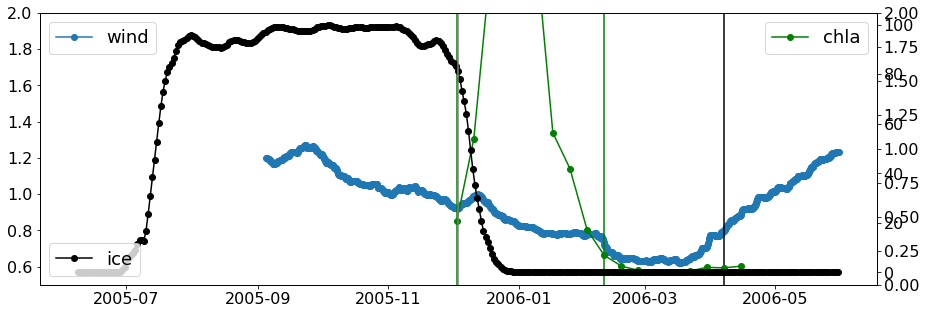

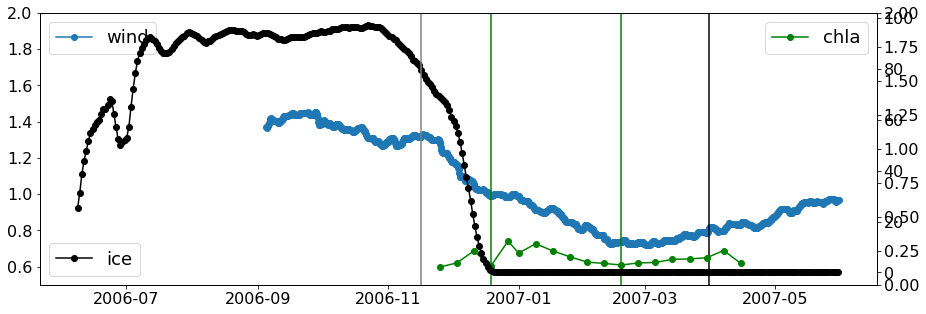

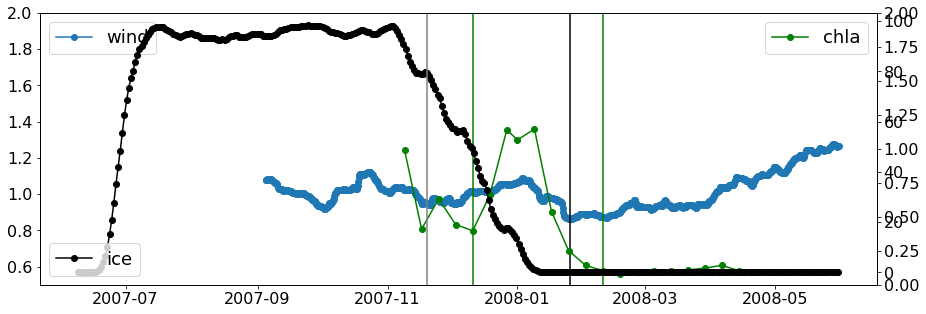

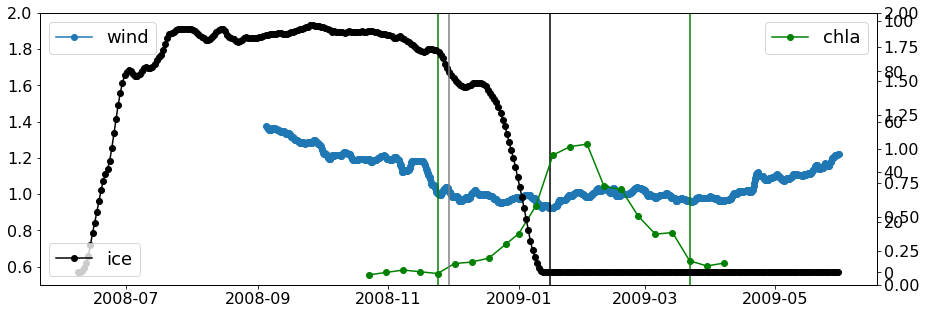

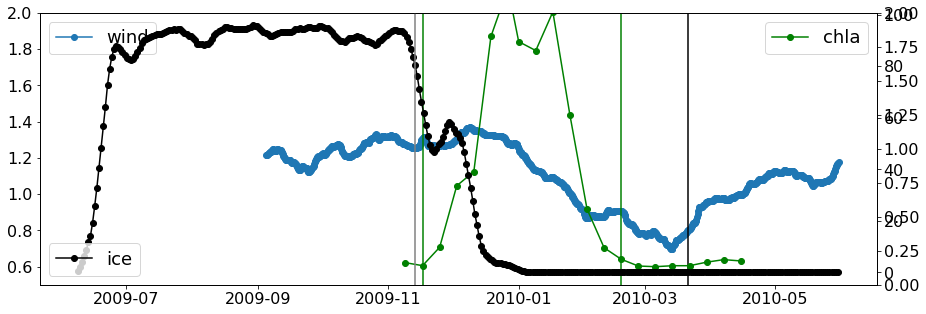

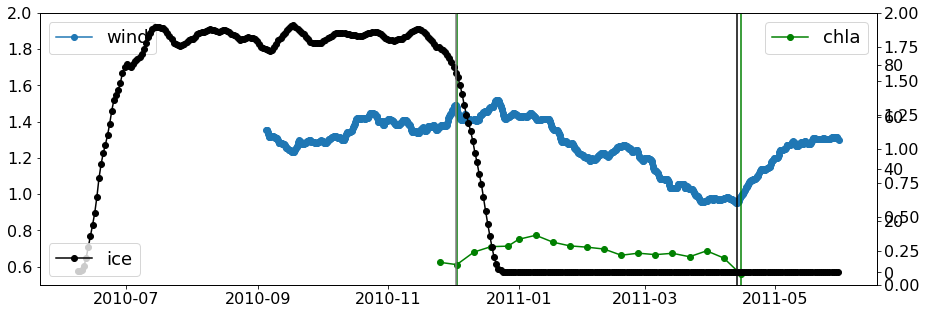

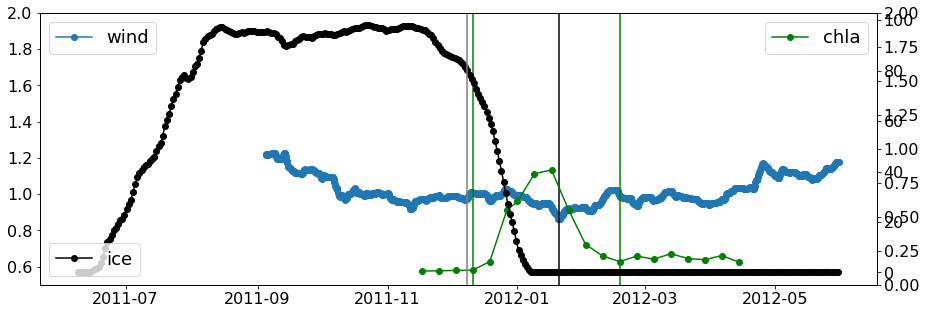

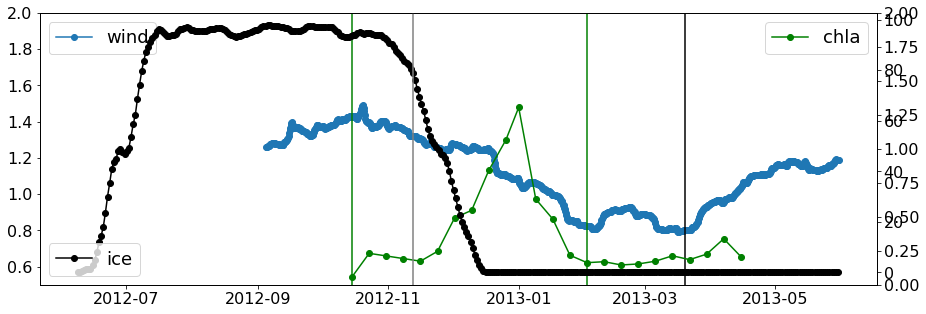

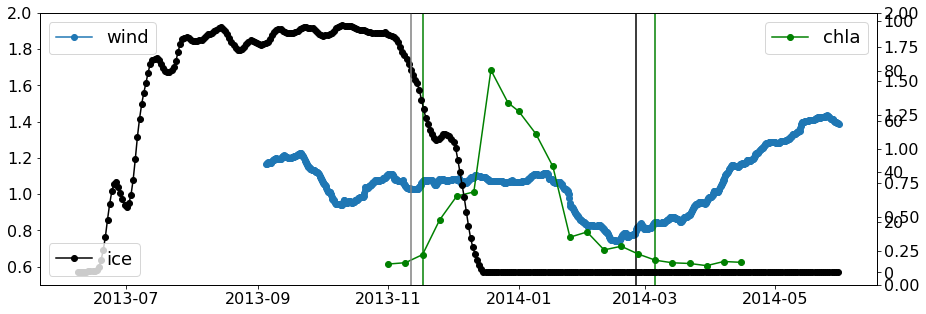

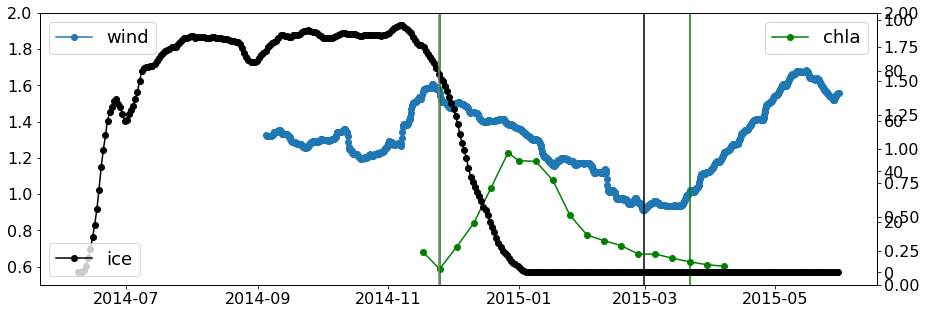

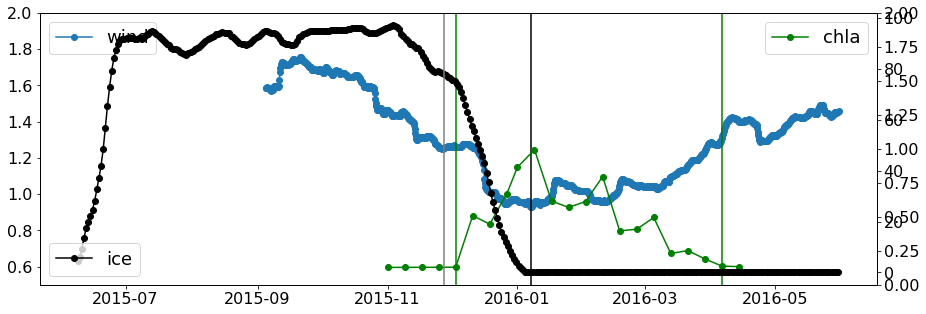

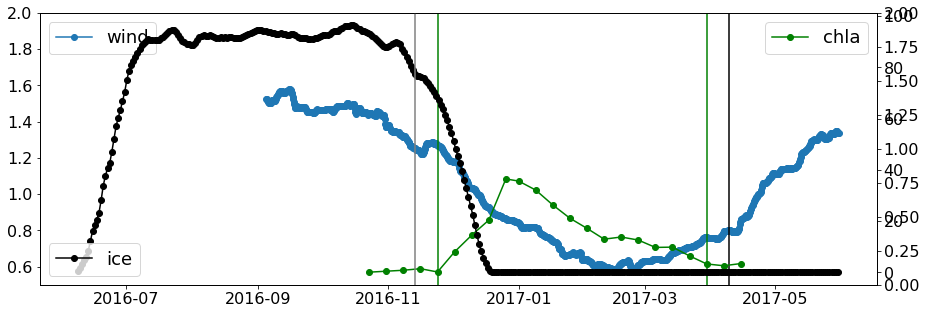

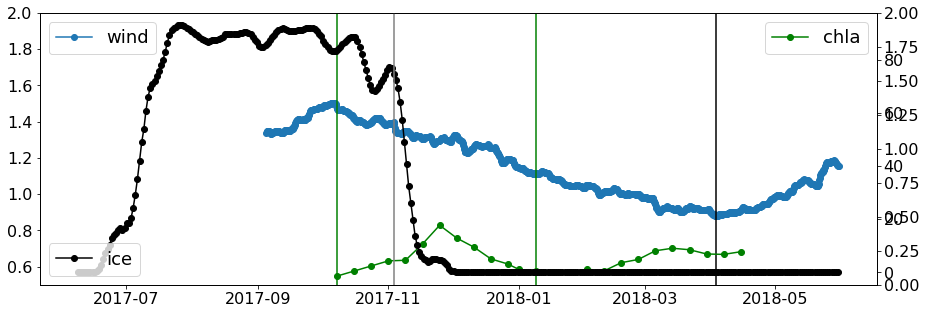

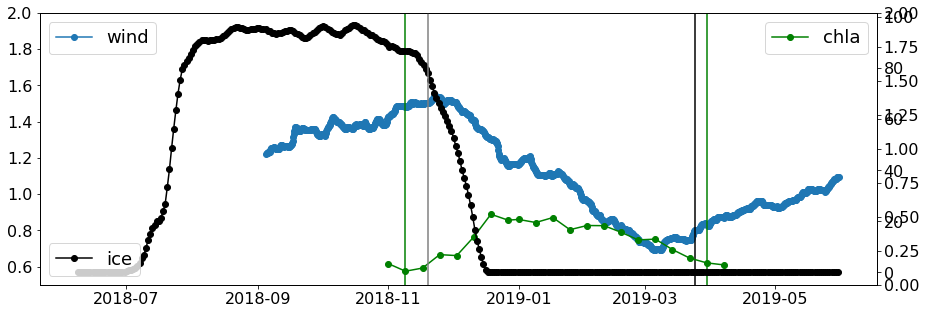

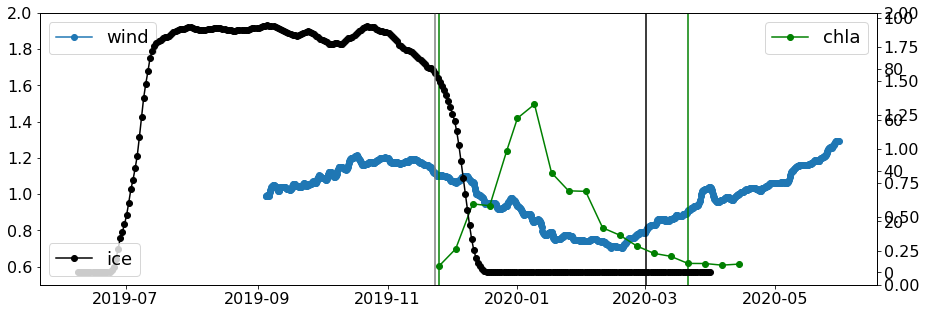

In [437]:
wind_increase_day = np.ndarray(23)
ice_melt_day=np.ndarray(23)


max_magnitude=np.ndarray(23)
duration = np.ndarray(23)
int_chl= np.ndarray(23)

bloom_start=np.ndarray(23)
bloom_end=np.ndarray(23)


# process wind data
# ds1 = xr.open_dataset(rootdir+'/data/era5/era5_subset1.nc')
# ds = xr.open_dataset(rootdir+'/data/era5/era5_subset.nc')

# ds2= xr.concat([ds1,ds],dim='time')
ds2 = xr.open_dataset('../data/era5_winds.nc')
era = ds2.sel(longitude=slice(-2.5,5),latitude=slice(-59,-61)).mean(dim='longitude').mean(dim='latitude')

def cart2pol(x, y):
    import numpy as np
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def calc_wind(u10_wind,v10_wind):

    import airsea
    from metpy.calc import wind_direction
    import numpy as np
    tau_x=airsea.windstress.stress(u10_wind,z=10,drag='largepond',rho_air=1.22,Ta=10.)
    tau_y=airsea.windstress.stress(v10_wind,z=10,drag='largepond',rho_air=1.22,Ta=10.)


    tx = np.where(u10_wind>0,tau_x,tau_x*-1)  # Add directional signs back to wind stress vectors
    ty = np.where(v10_wind>0,tau_y,tau_y*-1)

    tau = np.sqrt(tx**2+ty**2)

    [tau2,theta]=cart2pol(u10_wind,v10_wind)   #to get winds oriented 0 for Easterly. 
    wind_dir=np.rad2deg(theta)

    return tau, tx, ty, wind_dir
tau,tx,ty,wdir=calc_wind(era.u10,era.v10)
era['tau']=xr.DataArray(data=tau,coords=[era.time], dims=['time'])

copy  = xr.open_dataset(rootdir+'/src/satelite_analysis/seaice_subset5.nc')
si_ds=copy.sel(longitude=slice(-2.5,5),latitude=slice(-61,-59)).mean(dim='longitude').mean(dim='latitude')

ds3 = sat.sel(lat=slice(-59,-61),lon=slice(-2.5,5)).mean(dim='lat').mean(dim='lon')
satchl=ds3




for i,year in enumerate(np.arange(1997,2020)):
    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    erads=era.sel(time=slice(midyear_start,midyear_end))
    erads=erads.tau.rolling(time=24*8*2).mean()*10  # apply rolling window

    min_wind = erads.min().values
    min_ind = np.array(([erads==min_wind])).argmax()

    prepeak_max = erads[:min_ind+1].max().values
    postpeak_max = erads[min_ind:].max().values
    prepeak_subset = erads.isel(time=slice(0,min_ind+1))
    postpeak_subset = erads.isel(time=slice(min_ind,len(erads)))
#     termination=postpeak_subset.time[(postpeak_subset.values>min_wind+0.5*(postpeak_max-min_wind))].values[0]
    try:
#         termination=postpeak_subset.time[(postpeak_subset.values>(postpeak_subset.min().values+0.25*(postpeak_subset.max().values- postpeak_subset.min().values)))].values[0]
#         termination=postpeak_subset.time[(postpeak_subset.values>(1.05*(postpeak_subset.mean().values)))].values[0]
        termination=postpeak_subset.time[(postpeak_subset.values>0.8)].values[0]


    except: continue
#     termination=postpeak_subset.time[(postpeak_subset.values<postpeak_max)].values[0]

    wind_increase_day[i]=(pd.Series(termination).dt.dayofyear[0])


    fig,ax=plt.subplots(figsize=[15,5])
    ax.plot(erads.time,erads,marker='o',c='tab:blue',label='wind')
#     ax.plot(prepeak_subset.time,prepeak_subset,marker='o',c='tab:blue')
#     ax.plot(postpeak_subset.time,postpeak_subset,marker='o',c=darkblue)

    ax.axvline(termination,c='k')
    ax.set_ylim(0.5,2)

    plt.legend(loc=2)



# for i,year in enumerate(np.arange(1997,2020)):
    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    chlds=satchl.sel(time=slice(midyear_start,midyear_end))
    chlds=chlds.interpolate_na(dim='time')  # deal with nans
    chlds=chlds.dropna(dim='time')
    
    maxchl = chlds.chlor_a.max().values
#     apex = np.array(x.time[x.chlor_a==x.chlor_a.max()])
    apex_ind = np.array(([chlds.chlor_a==chlds.chlor_a.max()])).argmax()
    prepeak_min = chlds.chlor_a[:apex_ind+1].min().values
    postpeak_min = chlds.chlor_a[apex_ind:].min().values
    prepeak_subset = chlds.isel(time=slice(0,apex_ind+1))
    postpeak_subset = chlds.isel(time=slice(apex_ind,len(chlds.chlor_a)))
    try:
        initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+0.05*(maxchl-prepeak_min))].values[-1]
    except: continue
#     initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+0.05)]#.values[0]

#     print(initiation)
    try:
        termination=postpeak_subset.time[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))].values[0]
    except: continue
    length = (pd.Series(termination - initiation).dt.days)[0]

#     int_chl = np.nansum(x.iloc[initiation_ind:termination_ind].chlor_a)
    ax2=ax.twinx()
    
    
#     fig,ax=plt.subplots(figsize=[15,5])
    ax2.plot(chlds.time,chlds.chlor_a,marker='o',c='g',label='chla')
#     ax.axvline(chlds.time[apex_ind].values,c='r')
#     ax.plot(chlds.time[:apex_ind+1],chlds.chlor_a[:apex_ind+1])
#     ax.plot(chlds.time[apex_ind:],chlds.chlor_a[apex_ind:])
#     ax.axhline(inithres,c='k')
#     ax.axhline(termthres,c='grey')
    ax2.axvline(initiation,c='g')
    ax2.axvline(termination,c='g')
#     ax.text(0.05,0.9,'{}'.format(length),transform=ax.transAxes)
    plt.ylim(0,2)
    plt.legend(loc=1)
    max_magnitude[i]=maxchl
    duration[i]=length
    bloom_start[i]=pd.Series(initiation).dt.dayofyear[0]
    bloom_end[i]=pd.Series(termination).dt.dayofyear[0]
    int_chl[i]=(prepeak_subset.chlor_a[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))[-1]:].sum()+
                postpeak_subset.chlor_a[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))[0]].sum())


# max_magnitude_outliers=np.array(max_magnitude)




# for i,year in enumerate(np.arange(2000,2020)):

    midyear_start = '{}-06-01'.format(year)
    midyear_end = '{}-05-30'.format(year+1)
    iceds=si_ds.sel(time=slice(midyear_start,midyear_end))
    iceds=iceds.ice_conc.rolling(time=8).mean()  # apply rolling window
    max_ice = iceds.max().values
    max_ind = np.array(([iceds==max_ice])).argmax()
#     print(min_ind)
    prepeak_max = iceds[:max_ind+1].max().values
    postpeak_max = iceds[max_ind:].max().values
    prepeak_subset = iceds.isel(time=slice(0,max_ind+1))
    postpeak_subset = iceds.isel(time=slice(max_ind,len(iceds)))
#     initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))].values[-1]
#     try:
    termination=postpeak_subset.time[(postpeak_subset.values>postpeak_min+(0.8*(max_ice-postpeak_min)))].values[-1]
#         print(termination)
#         print()
    ice_melt_day[i]=(pd.Series(termination).dt.dayofyear[0])

    ax3=ax.twinx()
    
    ax3.plot(iceds.time,iceds,marker='o',c='k',label='ice')
#     ax3.axvline(iceds.time[max_ind].values,c='grey')
    ax3.axvline(termination,c='grey')
    
    plt.legend(loc=3)
    
#     plt.savefig('../results/figures/index_detection_{}.png'.format(year))
#     plt.close()



In [2744]:
bloom_start

array([0.81124699, 0.63697201, 0.62731028, 0.8210389 , 0.61536109,
       1.49368274, 0.91535211, 0.66171145, 2.62712669, 0.3214061 ,
       1.14588511, 1.03496397, 2.18342328, 0.36446607, 0.84521049,
       1.30523384, 1.57989705, 0.97146589, 0.99414539, 0.77898729,
       0.43811858, 0.51918453, 1.32804585])

In [2008]:
bloom_start[bloom_start<10]=np.nan
ice_melt_day[ice_melt_day<10]=np.nan

In [2039]:
bloom_end

array([ 57.,  57.,  49.,  49.,  97.,  81.,  81.,  49.,  49.,  49.,  49.,
        81.,  49., 105.,  49.,  41.,  65.,  97.,  89.,  89.,   9.,  89.,
        81.])

In [2718]:
wind_increase_day

array([121., 108., 122.,  95.,  56., 105.,  80.,  56., 102.,  85., 317.,
       134.,  84., 120.,  60., 103.,  90.,  85.,  86., 109.,  75., 107.,
        87.])

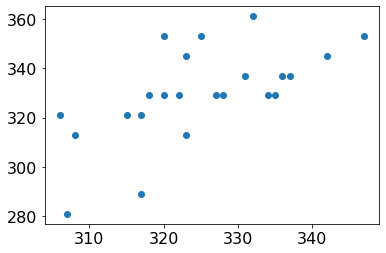

In [438]:
plt.scatter(ice_melt_day,bloom_start)

In [439]:
wind_increase_day[wind_increase_day>200]=np.nan

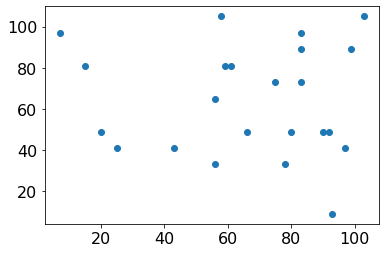

In [440]:
plt.scatter(wind_increase_day,bloom_end)

In [2674]:
from sklearn.linear_model import HuberRegressor, LinearRegression
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.plot(X,Y_pred,c='k',label='r2=0.51, p=0.01')
ice_melt_day_since=(((ice_melt_day[:]+ 180) %365)-180)
# good_period = np.array(np.abs(ice_melt_day_since)+wind_increase_day[:])

# good_period[good_period<40]=np.nan

In [2715]:
bloom_end[max_magnitude>1]=np.nan

In [1521]:
bloom_start[0]=bloom_start[0]-24

In [1522]:
bloom_start[1]=bloom_start[1]-16

In [1523]:
bloom_start[2]=bloom_start[2]-16

In [1524]:
bloom_start[10]=bloom_start[10]-24

In [1538]:
duration[-3]=np.nan

In [1526]:
wind_increase_day_copy= np.array(wind_increase_day)

In [1527]:
wind_increase_day=wind_increase_day_copy

In [1324]:
# wind_increase_day[max_magnitude>1.5]=np.nan

In [2675]:
good_period = np.array(np.abs(ice_melt_day_since)+wind_increase_day[:])

# good_period[good_period>200]=np.nan
good_period


array([115., 161., 132., 149., 115., 111.,  88.,  84., 124., 139.,  nan,
        83., 130.,  97.,  77., 158., 133., 141., 116., 162., 143., 150.,
       126.])

In [2065]:
good_period[good_period>300]=np.nan

In [2058]:
duration[max_magnitude>0.8]=np.nan

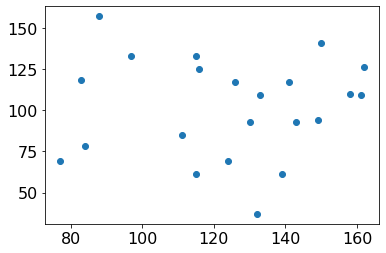

In [2676]:
plt.scatter(good_period[:], duration[:])

/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.008938874338028313
0.16017324795164345
0.22777540390092035
0.08439904075297376


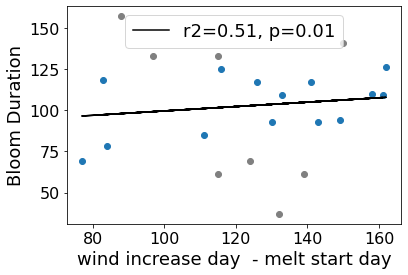

In [2677]:
X=np.abs(good_period[:])
# X = np.array(dom[:-1])
Y = np.array(
           duration[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.plot(X,Y_pred,c='k',label='r2=0.51, p=0.01')


# plt.scatter(X,Y,c=max_magnitude*2,cmap=cmo.algae,vmin=1,vmax=3.2)
# plt.colorbar()

plt.scatter(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False])
plt.scatter(X[linear_regressor.outliers_==True],Y[:][linear_regressor.outliers_==True],c='grey')

# plt.scatter(good_period[-1],duration[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(good_period[-2],duration[-2],marker='D',s=100,c='tab:blue')

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
plt.plot(X,Y_pred,c='k',label='r2=0.51, p=0.01')

plt.xlabel('wind increase day  - melt start day')
plt.ylabel('Bloom Duration')
plt.legend()

# print(linear_regressor.outliers_)
print(linear_regressor.score(X,Y))

print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False]))

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])

0.0002140153349459017
0.9587313595555141
0.039151860138988304
0.5375989306549309


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


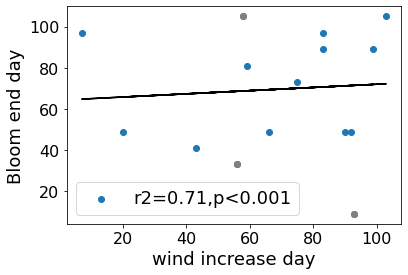

In [2757]:
X=np.abs(wind_increase_day[:])
# X = np.array(dom[:-1])
bloom_end[max_magnitude>1]=np.nan
Y = np.array(
            bloom_end[:])
Z=np.array(ice_melt_day)



mask = ~np.isnan(X)&~np.isnan(Y)#&~np.isnan(Z)
print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X,Y,label='r2=0.71,p<0.001')
plt.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')
# plt.scatter(wind_increase_day[-1],bloom_end[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(wind_increase_day[-2],bloom_end[-2],marker='D',s=100,c='tab:blue')

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
plt.plot(X,Y_pred,c='k')
plt.legend()

plt.xlabel('wind increase day')
plt.ylabel('Bloom end day')
# plt.legend()

# print(linear_regressor.outliers_)
# print(linear_regressor.coef_)

# print(linear_regressor.score(X,Y))
# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))
# print((pearsonr(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))[0]**2)
# print((pearsonr(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))[1])

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])


In [2002]:
 bloom_start[bloom_start<10]=np.nan
ice_melt_day[ice_melt_day<10]=np.nan

0.4520442693414966
0.00044083265690112925
0.44573633022704096
0.7891687422462839
9.686341573256367e-06


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


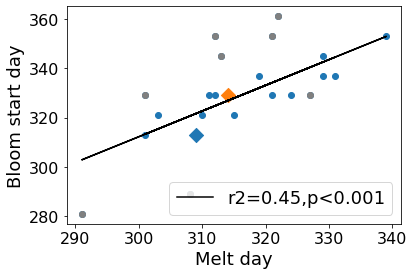

In [2712]:
X=np.abs(ice_melt_day[:])
# X = np.array(dom[:-1])
Y = np.array(
            bloom_start[:])

# mask = ~np.isnan(X)&~np.isnan(Y)&~np.isnan(Z)
mask = ~np.isnan(X)&~np.isnan(Y)#&~np.isnan(Z)&~np.isnan(V)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor2 = HuberRegressor(epsilon=1.35)
# linear_regressor2 = LinearRegression()

linear_regressor2.fit(X,Y)
Y_pred = linear_regressor2.predict(X)

plt.scatter(X,Y)
plt.scatter(X[linear_regressor2.outliers_],Y[:][linear_regressor2.outliers_],c='grey')
plt.scatter(ice_melt_day[-1],  bloom_start[-1],marker='D',s=100,c='tab:orange')
plt.scatter(ice_melt_day[-2],  bloom_start[-2],marker='D',s=100,c='tab:blue')

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
plt.plot(X,Y_pred,c='k',label='r2=0.45,p<0.001')
plt.legend()
plt.xlabel('Melt day')
plt.ylabel('Bloom start day')
# plt.legend()

# print(linear_regressor.outliers_)
# print(linear_regressor.coef_)

print(linear_regressor2.score(X,Y))
# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))
mask = ~np.isnan(X[linear_regressor2.outliers_==False])&~np.isnan(Y[:][linear_regressor2.outliers_==False])

print((pearsonr(X[linear_regressor2.outliers_==False][mask],Y[linear_regressor2.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor2.outliers_==False][mask],Y[linear_regressor2.outliers_==False][mask]))[1])
# plt.ylim(200,350)

In [2011]:
np.array(int_chl[-9:])

array([4.94065646e-324, 6.93320435e-310, 4.66839074e-313, 1.32903659e-321,
       0.00000000e+000, 8.48798318e-314, 4.94065646e-324, 6.93290877e-310,
       1.82491638e-312])

In [1855]:
np.array(int_chl[14:23])

array([4.0176264 , 6.21468294, 5.30946457, 3.83608818, 4.64803433,
       3.99765819, 2.03208241, 2.72141325, 5.9245193 ])

In [2322]:
int_chl_tot = np.array([4.0176264 , 6.21468294, 5.30946457, 3.83608818, 4.64803433,
       3.99765819, 2.03208241, 2.72141325, 5.9245193 ,7.13376951, 4.25495517, 7.5155412 , 5.45724791, 3.91265386,
       3.84840596, 2.75572783, 4.38371795, 4.50611293])

In [2680]:
Y=np.array(int_chl_tot)

X = np.array(icecover[:])
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


fig=plt.figure(figsize=[15,5])
fig.add_subplot(121)
plt.title('int chl-a r2=0.89')

plt.scatter(X,Y)

plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')

# plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')


print(linear_regressor.score(X,Y))

plt.plot(X,Y_pred,c='k')
print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))


ValueError: operands could not be broadcast together with shapes (36,) (18,) 

0.30409335463615317
0.7945263550095631
0.16522624059521374
0.15778242226438643


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


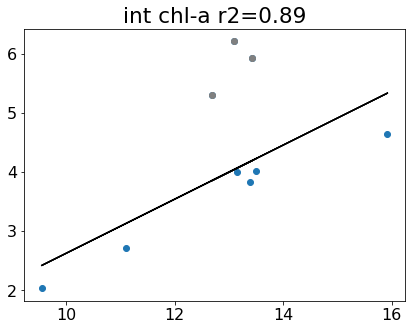

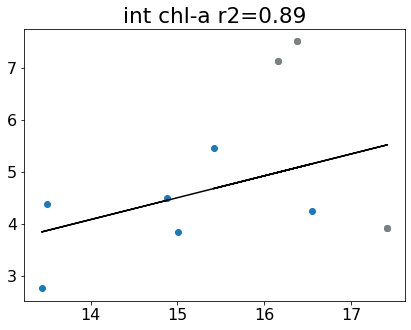

In [1852]:
Y=np.array(int_chl[14:23])

X = np.array(icecover[:9])
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


fig=plt.figure(figsize=[15,5])
fig.add_subplot(121)
plt.title('int chl-a r2=0.89')

plt.scatter(X,Y)

plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')

# plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')


print(linear_regressor.score(X,Y))

plt.plot(X,Y_pred,c='k')
print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))



Y=np.array(int_chl[-9:])

X = np.array(icecover[-9:])
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


fig=plt.figure(figsize=[15,5])
fig.add_subplot(121)
plt.title('int chl-a r2=0.89')

plt.scatter(X,Y)

plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')

# plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')


print(linear_regressor.score(X,Y))

plt.plot(X,Y_pred,c='k')
print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))



0.24799744817340297
0.7746811896663341
0.12665561224047017
0.5076890005878327


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'chl-a r2=0.68')

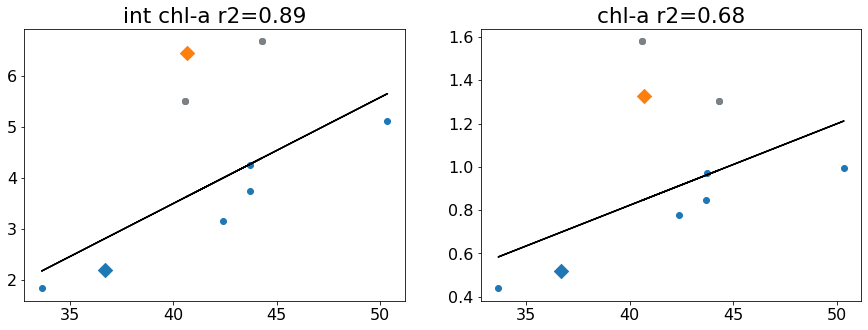

In [2681]:

# max_magnitude[max_magnitude>1.3]=np.nan
Y=np.array(int_chl[-9:])

X = np.array(total_icecover[:])
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


fig=plt.figure(figsize=[15,5])
fig.add_subplot(121)
plt.title('int chl-a r2=0.89')

plt.scatter(X,Y)

plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')

plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')


print(linear_regressor.score(X,Y))




plt.plot(X,Y_pred,c='k')

print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))


Y=np.array(max_magnitude[-9:])

X = np.array(total_icecover[:])
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
print(linear_regressor.score(X,Y))


fig.add_subplot(122)

plt.scatter(X,Y)
plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')
plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')
linear_regressor.score(X,Y)
plt.plot(X,Y_pred,c='k')

print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))
# print(linear_regressor.score(X,Y))

plt.title('chl-a r2=0.68')

In [2320]:
max_magnitude=max_magnitude_outliers

0.5156476094525497
0.02934344108748243


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


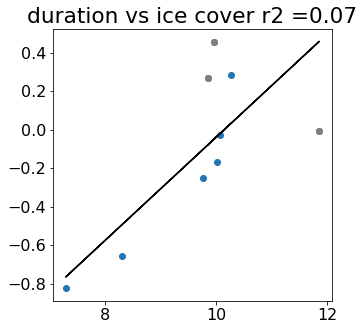

In [2708]:
# max_magnitude[max_magnitude>1.1]=np.nan
Y=np.log(np.array(max_magnitude_ur[-9:]))
# Y=np.array(int_chl[-9: ])

# Y=np.array(duration[-9:])

X = np.array(total_icecover_ur)
mask = ~np.isnan(X)&~np.isnan(Y)
print(pearsonr(X[mask],Y[mask])[0]**2)
print(pearsonr(X[mask],Y[mask])[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)


fig=plt.figure(figsize=[5,5])
plt.title('duration vs ice cover r2 =0.07')

plt.scatter(X,Y)

plt.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],c='grey')

# plt.scatter(X[-1],  Y[-1],marker='D',s=100,c='tab:orange')
# plt.scatter(X[-2],  Y[-2],marker='D',s=100,c='tab:blue')


# print(linear_regressor.score(X,Y))

plt.plot(X,Y_pred,c='k')

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))

# mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

# print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
# print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])

In [2126]:
par = xr.open_dataset('../data/par_data.nc')#.to_dataframe()
# parsummer_avg=par[8:].resample('6M').mean().resample('Y').max()#.plot(marker='o')
# parsummmer_outliers=np.array(parsummer_avg.squeeze())

In [2303]:
# load sea ice gridded data
ds = xr.open_dataset('../results/data/sea_ice_thickness_grid.nc')
ds['lon']=ds.lon[1,:]
ds['lat']=ds.lat[:,1]
ds=ds.swap_dims({'x':'lon','y':'lat'})
ds=ds.sel(date=slice('2011-01-01','2020-01-01'))

_, index = np.unique(ds['date'], return_index=True)
ds=ds.isel(date=index)
total_icecover=(ds.resample(date='1Y').sum().sum(dim='lat').sum(dim='lon')/1e6).thickness.values#.plot(marker='o')
total_icecover_outliers=np.array(total_icecover)
# total_icecover[total_icecover>22]=np.nan

In [2221]:
total_icecover

array([43.68529069, 44.30232305, 40.58898991, 43.71478221, 50.34465734,
       42.39828279, 33.65139341, 36.69938758, 40.68723434])

In [2277]:
ds = xr.open_dataset('../results/data/sea_ice_thickness_grid_mid.nc')
ds['lon']=ds.lon[1,:]
ds['lat']=ds.lat[:,1]
ds=ds.swap_dims({'x':'lon','y':'lat'})
ds=ds.sel(date=slice('2011-01-01','2020-01-01'))

_, index = np.unique(ds['date'], return_index=True)
ds=ds.isel(date=index)
total_icecover1=(ds.resample(date='1Y').sum().sum(dim='lat').sum(dim='lon')/1e6).thickness.values#.plot(marker='o')
total_icecover_outliers=np.array(total_icecover)

In [2278]:
total_icecover1

array([21.14915484, 20.85034899, 20.30081629, 20.62550967, 24.1901999 ,
       20.36144266, 15.63492664, 17.40162404, 20.51234922])

In [1831]:
icecover = np.array([13.49554371, 13.09377696, 12.68229799, 13.38983709, 15.92017204,
       13.14628453,  9.54595608, 11.0990888 , 13.42869278 ,16.15179746, 16.547655  , 16.37541167, 15.41399377, 17.41419747,
       15.00364737, 13.43795767, 13.50407319, 14.8781623 ])

In [1830]:
total_icecover

array([16.15179746, 16.547655  , 16.37541167, 15.41399377, 17.41419747,
       15.00364737, 13.43795767, 13.50407319, 14.8781623 ])

In [1829]:
total_icecover1

array([13.49554371, 13.09377696, 12.68229799, 13.38983709, 15.92017204,
       13.14628453,  9.54595608, 11.0990888 , 13.42869278])

In [130]:
# import cmocean.cm as cmo
# import matplotlib 
# import seaborn as sns
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 
# matplotlib.rcParams.update({'font.size': 14})

# fig=plt.figure(figsize=[20,5],constrained_layout=False)

# fig.add_subplot(141)

# ice_melt = ice_melt.astype('float')
# ice_melt[ice_melt<260]=np.nan
# ice_melt[ice_melt>320]=np.nan

# Y=np.array(duration)
# X = np.array(ice_melt[:-1])

# mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

# X= X[mask].reshape(-1,1)
# Y =Y[mask].reshape(-1,1)

# linear_regressor = LinearRegression()
# linear_regressor.fit(X,Y)
# Y_pred = linear_regressor.predict(X)


# plt.scatter(ice_melt_outliers[:-1],duration,color=grey_shade,s=50,marker='x')

# plt.scatter(ice_melt[:-1],duration,c=max_magnitude_outliers,cmap=cmo.delta,s=100,vmin=0,vmax=1)
# plt.scatter(ice_melt[-3],duration[-2],s=200,c=max_magnitude[-2],cmap=cmo.delta,vmin=0.5,vmax=2,marker='D',edgecolors=lightblue,linewidth=3)
# plt.scatter(ice_melt[-2],duration[-1],s=200,c=max_magnitude[-1],cmap=cmo.delta,vmin=0.5,vmax=2,marker='D',edgecolors=orange,linewidth=3)

# plt.plot(X,Y_pred,c='k',label='r$^2$=0.34,p<0.01')

# plt.xlabel('Day of Melt')
# plt.ylabel('Bloom length')


# plt.legend(frameon=False)


# parsummer_avg=parsummer_avg.squeeze()
# parsummer_avg[parsummer_avg<25]=np.nan
# fig.add_subplot(142)

# Y=np.array(duration[-19:])
# # X = np.array(ice_melt[:-1]) 
# X = np.array(parsummer_avg.squeeze())


# mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

# X= X[mask].reshape(-1,1)
# Y =Y[mask].reshape(-1,1)

# linear_regressor = LinearRegression()
# linear_regressor.fit(X,Y)
# Y_pred = linear_regressor.predict(X)

# plt.scatter(parsummer_avg.squeeze(),duration[-19:],c=max_magnitude[-19:]*2,s=100,cmap=cmo.delta,vmin=0.5,vmax=4)
# plt.scatter(parsummer_avg.squeeze()[-2],duration[-2],s=200,c=max_magnitude[-2]*2,cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=lightblue,linewidth=3)
# plt.scatter(parsummer_avg.squeeze()[-1],duration[-1],s=200,c=max_magnitude[-1]*2,cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=orange,linewidth=3)

# plt.plot(X,Y_pred,c='k',label='r$^2$=0.64,p<0.01')

# plt.xlabel('Average PAR')
# plt.ylabel('Bloom length')
# plt.legend(frameon=False)


# # average par is related to ice duration - when there is ice cover, PAR is not there


# ax=fig.add_subplot(143)

# # remove one outlier

# max_magnitude[max_magnitude>1.3]=np.nan
# Y=np.array(max_magnitude[-9:]*2)

# X = np.array(total_icecover)
# mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

# X= X[mask].reshape(-1,1)
# Y =Y[mask].reshape(-1,1)

# linear_regressor = LinearRegression()
# linear_regressor.fit(X,Y)
# Y_pred = linear_regressor.predict(X)
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')

# plt.scatter(total_icecover,max_magnitude[-9:]*2,s=100,c=max_magnitude[-9:]*2,cmap=cmo.delta,vmin=0.5,vmax=4)
# plt.scatter(total_icecover[-2],max_magnitude[-2]*2,s=200,c=max_magnitude[-2]*2,cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=lightblue,linewidth=3)
# plt.scatter(total_icecover[-1],max_magnitude[-1]*2,s=200,c=max_magnitude[-1]*2,cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=orange,linewidth=3)

# plt.plot(X,Y_pred,label='r$^2$=0.71,p<0.05',c='k')
# plt.xlabel('ice_index')
# plt.ylabel('chl-max')
# plt.legend(frameon=False)
# plt.xlim(15,25)

# ax=fig.add_subplot(144)

# # hand made from other calculations - make this more robust
# mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together

# iceind=np.repeat(total_icecover_outliers,2)[-10:-1]


# max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
# max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019

# Y=np.array(mld_all)
# X = np.array(iceind)
# mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

# X= X[mask].reshape(-1,1)
# Y =Y[mask].reshape(-1,1)

# linear_regressor = LinearRegression()
# linear_regressor.fit(X,Y)
# Y_pred = linear_regressor.predict(X)

# plt.scatter(total_icecover_outliers[-5:-1],mld2[:],s=100,c=max2,cmap=cmo.delta,vmin=0.5,vmax=4)
# plt.scatter(total_icecover_outliers[-5:],mld1[:],s=100,c=max1,cmap=cmo.delta,vmin=0.5,vmax=4)

# plt.scatter(total_icecover_outliers[-1],mld1[-1],s=200,c=max1[-1],cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=orange,linewidth=3)
# plt.scatter(total_icecover_outliers[-2],mld1[-2],s=200,c=max1[-2],cmap=cmo.delta,vmin=0.5,vmax=4,marker='D',edgecolors=lightblue,linewidth=3)

# plt.plot(X,Y_pred,c='k',label='r$^2$=0.72,p<0.01')
# plt.legend(loc=4,frameon=False) 
# plt.xlabel('ice_index')
# plt.ylabel('mld-max')
# # plt.xlim(15,25)
# cbar=plt.colorbar() 

# cbar.set_label('Chl-a max')
# # note that the mld max regression is not made of totally independent points because the same ice index is used for each MLD depth
# # tested sentivitiy to slightly different box sizes - the relation holds with slight variations in the r2 value. Here using -59:-62 | -5,5
# # the total ice volume is somewhat convolved with the ice duration. However, taking ice duration alone does not predict summer chl-a max

# Climatology

In [2098]:
#make argo climatology

# argo1.schl.resample(time='M').mean().plot()

argo1_clim=argo1.schl.groupby("time.week").mean("time").to_series()
argo2_clim=argo2.schl.groupby("time.week").mean("time").to_series()


# new_order = [6,7,8,9,10,11,12,1,2,3,4,5]

# month_names = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May' ]
# # chlpivot = df.pivot("week", "year", "chlor_a")

# argo1_clim2= argo1_clim.reindex(new_order, axis=0)
# argo2_clim2= argo2_clim.reindex(new_order, axis=0)

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


In [132]:
chl=satchl.sel(time=slice('1997-07-01','2020-06-30')).resample(time='1M').mean()
df=chl.to_dataframe()
df['month']=df.index.month
# df['week']=df.index.isocalendar().week

df['year']=df.index.year
df.reset_index()
df['season']=df.year.shift(6).bfill().astype(np.int)
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
# new_order = [30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,
#             18,19,20,21,22,23,24,25,26,27,28,29]

new_order = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May' ]
chlpivot = df[:].pivot("month", "season", "chlor_a")
# chlpivot = df.pivot("week", "year", "chlor_a")

chlpivot= chlpivot.reindex(new_order, axis=0)

<AxesSubplot:xlabel='month', ylabel='season'>

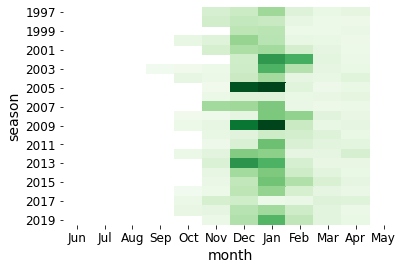

In [133]:
sns.heatmap(chlpivot.T,cmap=plt.cm.Greens,alpha=1,cbar=False,vmin=0,vmax=1.5)


In [134]:
wind=era.tau.sel(time=slice('2000-07-01','2020-05-30')).resample(time='1M').mean()
dfw=wind.to_dataframe()
dfw['month']=dfw.index.month
dfw['year']=dfw.index.year
dfw.reset_index()
dfw['season']=dfw.year.shift(6).bfill().astype(np.int)
dfw['month'] = dfw['month'].apply(lambda x: calendar.month_abbr[x])
dfw
new_order = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', ]
windpivot = dfw.pivot("month", "season", "tau")
windpivot= windpivot.reindex(new_order, axis=0)

<AxesSubplot:xlabel='month', ylabel='season'>

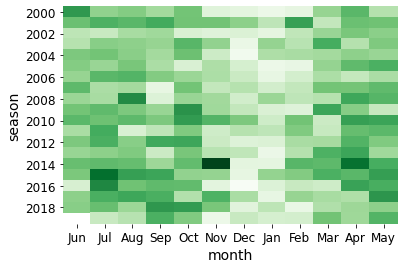

In [135]:
sns.heatmap(windpivot.T,cmap=plt.cm.Greens,alpha=1,cbar=False)


In [136]:
# dsice = xr.open_dataset('../src/satelite_analysis/seaice_subset5.nc')
# icemean=dsice.sel(longitude=slice(-8,8)).mean(dim='longitude').sel(latitude=slice(-61,-59)).mean(dim='latitude')
# icesub=dsice.mean(dim='lon').mean(dim='lat').sel(time=slice('2000-01-01','2019-12-31'))
ice=si_ds.ice_conc.resample(time='1M').mean().sel(time=slice('1997-01-01','2020-04-01'))
dfi=ice.to_dataframe()
dfi['month']=dfi.index.month
dfi['year']=dfi.index.year

dfi.reset_index()


dfi['season']=dfi.year.shift(5)
dfi=dfi.dropna()

dfi['season']=dfi['season'].astype(int)
dfi['month'] = dfi['month'].apply(lambda x: calendar.month_abbr[x])
# dfi=dfi.set_index(['year'])
# print(dfi)
new_order = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May' ]
icepivot = dfi.pivot("month", "season", "ice_conc")
icepivot= icepivot.reindex(new_order, axis=0)

<AxesSubplot:xlabel='month', ylabel='season'>

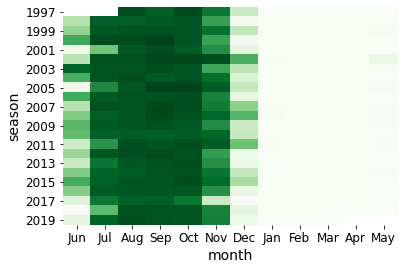

In [137]:
sns.heatmap(icepivot.T,cmap=plt.cm.Greens,alpha=1,cbar=False)


### Compute threshold indices from climatologies



In [138]:
# use xarray to recompute climatologies

# ice_climatology=si_ds.ice_conc.groupby("time.week").mean("time").to_series()
# wind_climatology=era.tau.groupby("time.week").mean("time").to_series()
# chl_climatology=satchl.chlor_a.groupby("time.week").mean("time").to_series()

# # argo1_clim=argo1.schl.groupby("time.month").mean("time").to_series()
# # argo2_clim=argo2.schl.groupby("time.month").mean("time").to_series()

# # new_order = [6,7,8,9,10,11,12,1,2,3,4,5]
# new_order = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

# # # month_names = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May' ]
# # # # chlpivot = df.pivot("week", "year", "chlor_a")

# wind_climatology= wind_climatology.reindex(new_order, axis=0)
# chl_climatology= chl_climatology.reindex(new_order, axis=0)
# ice_climatology= ice_climatology.reindex(new_order, axis=0)


/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


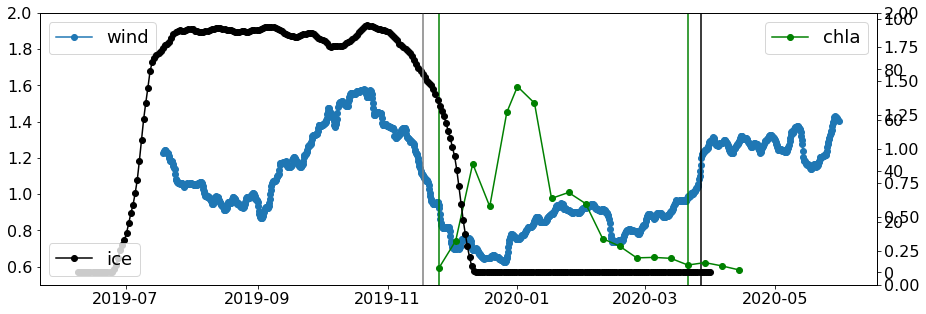

In [1686]:
wind_increase_day_clim = np.ndarray(1)
ice_melt_day_clim=np.ndarray(1)


max_magnitude_clim=np.ndarray(1)
# duration_clim = np.ndarray(20)
# int_chl= np.ndarray(20)

bloom_start_clim=np.ndarray(1)
bloom_end_clim=np.ndarray(1)


midyear_start = '{}-06-01'.format(year)
midyear_end = '{}-05-30'.format(year+1)
erads=era.sel(time=slice(midyear_start,midyear_end))
erads=erads.tau.rolling(time=24*8).mean()*10  # apply rolling window

min_wind = erads.min().values
min_ind = np.array(([erads==min_wind])).argmax()

prepeak_max = erads[:min_ind+1].max().values
postpeak_max = erads[min_ind:].max().values
prepeak_subset = erads.isel(time=slice(0,min_ind+1))
postpeak_subset = erads.isel(time=slice(min_ind,len(erads)))
#     termination=postpeak_subset.time[(postpeak_subset.values>min_wind+0.5*(postpeak_max-min_wind))].values[0]
termination=postpeak_subset.time[(postpeak_subset.values>1.1*postpeak_subset.mean().values )].values[0]

#     termination=postpeak_subset.time[(postpeak_subset.values<postpeak_max)].values[0]

wind_increase_day[i]=(pd.Series(termination).dt.dayofyear[0])


fig,ax=plt.subplots(figsize=[15,5])
ax.plot(erads.time,erads,marker='o',c='tab:blue',label='wind')
#     ax.plot(prepeak_subset.time,prepeak_subset,marker='o',c='tab:blue')
#     ax.plot(postpeak_subset.time,postpeak_subset,marker='o',c=darkblue)

ax.axvline(termination,c='k')
ax.set_ylim(0.5,2)

plt.legend(loc=2)



# for i,year in enumerate(np.arange(1997,2020)):
midyear_start = '{}-06-01'.format(year)
midyear_end = '{}-05-30'.format(year+1)
chlds=satchl.sel(time=slice(midyear_start,midyear_end))
chlds=chlds.interpolate_na(dim='time')  # deal with nans
chlds=chlds.dropna(dim='time')

maxchl = chlds.chlor_a.max().values
#     apex = np.array(x.time[x.chlor_a==x.chlor_a.max()])
apex_ind = np.array(([chlds.chlor_a==chlds.chlor_a.max()])).argmax()
prepeak_min = chlds.chlor_a[:apex_ind+1].min().values
postpeak_min = chlds.chlor_a[apex_ind:].min().values
prepeak_subset = chlds.isel(time=slice(0,apex_ind+1))
postpeak_subset = chlds.isel(time=slice(apex_ind,len(chlds.chlor_a)))
initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))].values[-1]
termination=postpeak_subset.time[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))].values[0]
length = (pd.Series(termination - initiation).dt.days)[0]

#     int_chl = np.nansum(x.iloc[initiation_ind:termination_ind].chlor_a)
ax2=ax.twinx()


#     fig,ax=plt.subplots(figsize=[15,5])
ax2.plot(chlds.time,chlds.chlor_a,marker='o',c='g',label='chla')
#     ax.axvline(chlds.time[apex_ind].values,c='r')
#     ax.plot(chlds.time[:apex_ind+1],chlds.chlor_a[:apex_ind+1])
#     ax.plot(chlds.time[apex_ind:],chlds.chlor_a[apex_ind:])
#     ax.axhline(inithres,c='k')
#     ax.axhline(termthres,c='grey')
ax2.axvline(initiation,c='g')
ax2.axvline(termination,c='g')
#     ax.text(0.05,0.9,'{}'.format(length),transform=ax.transAxes)
plt.ylim(0,2)
plt.legend(loc=1)
max_magnitude[i]=maxchl
duration[i]=length
bloom_start[i]=pd.Series(initiation).dt.dayofyear[0]
bloom_end[i]=pd.Series(termination).dt.dayofyear[0]
int_chl[i]=(prepeak_subset.chlor_a[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))[-1]:].sum()+
            postpeak_subset.chlor_a[(postpeak_subset.chlor_a.values<postpeak_min+(0.05*(maxchl-postpeak_min)))[0]].sum())


# max_magnitude_outliers=np.array(max_magnitude)




# for i,year in enumerate(np.arange(2000,2020)):

midyear_start = '{}-06-01'.format(year)
midyear_end = '{}-05-30'.format(year+1)
iceds=si_ds.sel(time=slice(midyear_start,midyear_end))
iceds=iceds.ice_conc.rolling(time=8).mean()  # apply rolling window
max_ice = iceds.max().values
max_ind = np.array(([iceds==max_ice])).argmax()
#     print(min_ind)
prepeak_max = iceds[:max_ind+1].max().values
postpeak_max = iceds[max_ind:].max().values
prepeak_subset = iceds.isel(time=slice(0,max_ind+1))
postpeak_subset = iceds.isel(time=slice(max_ind,len(iceds)))
#     initiation=prepeak_subset.time[(prepeak_subset.chlor_a.values<prepeak_min+(0.05*(maxchl-prepeak_min)))].values[-1]
#     try:
termination=postpeak_subset.time[(postpeak_subset.values>postpeak_min+(0.8*(max_ice-postpeak_min)))].values[-1]
#         print(termination)
#         print()
ice_melt_day[i]=(pd.Series(termination).dt.dayofyear[0])

ax3=ax.twinx()

ax3.plot(iceds.time,iceds,marker='o',c='k',label='ice')
#     ax3.axvline(iceds.time[max_ind].values,c='grey')
ax3.axvline(termination,c='grey')

plt.legend(loc=3)

### Gliders

In [2099]:
gl1= xr.open_dataset(rootdir+'/build/intermediate_data/sg643_optics_gridded_29012021.nc')
gl2= xr.open_dataset(rootdir+'/build/intermediate_data/sg640_optics_30012021.nc')
schl_gl1=gl1.chl[:20,:].mean(dim='depth')#.resample(time='1M').mean()
schl_gl2=gl2.chl[:20,:].mean(dim='depth')#.resample(time='1M').mean()


gl2018 = pd.DataFrame({'chla':schl_gl1,
                      'time':gl1.time})

gl2018=gl2018.set_index('time')

gl2019 = pd.DataFrame({'chla':schl_gl2,
                      'time':gl2.time})

gl2019=gl2019.set_index('time')

In [2139]:
# use xarray to recompute climatologies

ice_climatology=si_ds.ice_conc.groupby("time.week").mean("time").to_dataframe()
ice_climatology['variance']=si_ds.ice_conc.groupby("time.week").std("time").to_series()

# ice_climatology['month']=si_ds.time.groupby("time.week").mean("time")


# ice_climatology=si_ds.ice_conc.resample(time='W').mean("time").to_series()
wind_climatology=era.tau.groupby("time.week").mean("time").to_dataframe()
wind_climatology['variance']=era.tau.groupby("time.week").std("time").to_series()

chl_climatology=satchl.chlor_a.groupby("time.week").mean("time").to_dataframe()
chl_climatology['variance']=satchl.chlor_a.groupby("time.week").std("time").to_series()

argo1_clim=argo1.schl.groupby("time.week").mean("time").to_dataframe()
argo2_clim=argo2.schl.groupby("time.week").mean("time").to_dataframe()


par_climatology = par.groupby('time.week').mean('time').to_dataframe()
par_climatology['variance'] = par.par.groupby("time.week").std("time").to_series()

# new_order = [6,7,8,9,10,11,12,1,2,3,4,5]
# new_order = [30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

# # month_names = ['Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May' ]
# # # # chlpivot = df.pivot("week", "year", "chlor_a")

# wind_climatology= wind_climatology.reindex(new_order, axis=0)
# chl_climatology= chl_climatology.reindex(new_order, axis=0)
# ice_climatology= ice_climatology.reindex(new_order, axis=0)


/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalenda

In [2140]:
weeks_since=(((chl_climatology.index[:]+ 26) %54)-26)
weeks_since_argo=(((argo1_clim.index[:]+ 26) %54)-26)
weeks_since_argo2=(((argo2_clim.index[:]+ 26) %54)-26)
weeks_since_par =(((par_climatology.index[:]+ 26) %54)-26)

In [2141]:
wind_climatology.iloc[27]=np.nan

In [2142]:
ice_climatology.iloc[27]=np.nan

In [2143]:
chl_climatology['weeks_since']=weeks_since
wind_climatology['weeks_since']=weeks_since
ice_climatology['weeks_since']=weeks_since
par_climatology['weeks_since']=weeks_since_par

argo1_clim['weeks_since']=weeks_since_argo
argo2_clim['weeks_since']=weeks_since_argo2


In [2144]:
chl_climatology=chl_climatology.set_index('weeks_since').sort_values('weeks_since')
ice_climatology=ice_climatology.set_index('weeks_since').sort_values('weeks_since')
wind_climatology=wind_climatology.set_index('weeks_since').sort_values('weeks_since')
par_climatology=par_climatology.set_index('weeks_since').sort_values('weeks_since')

argo1_clim=argo1_clim.set_index('weeks_since').sort_values('weeks_since')
argo2_clim=argo2_clim.set_index('weeks_since').sort_values('weeks_since')

0.010306656748147125
0.08820236707863353
0.4046699384099315
simple -0.07405888632981528
0.4904504299387708
0.0797179363192193
0.645407882927245
0.009103582617223228


<ipython-input-1745-9121f0b3ddc9>:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels([''])
<ipython-input-1745-9121f0b3ddc9>:150: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels([''])
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.01, 0.9, 'e')

/opt/anaconda3/envs/data/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


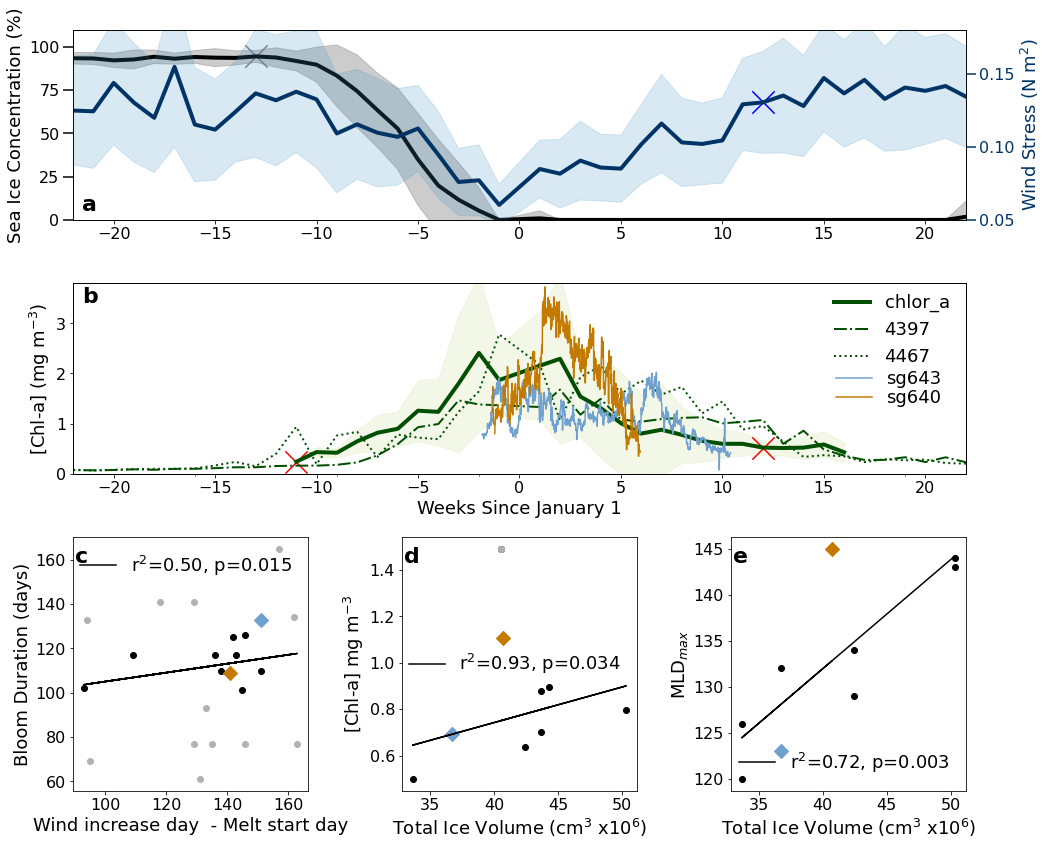

In [1745]:
import matplotlib 
import seaborn as sns
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})

import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=[16,14],constrained_layout=True)
gs = gridspec.GridSpec(3, 3,wspace=0.4,hspace=0.3,height_ratios =(0.3,0.3,0.4))
ax = plt.subplot(gs[0, :])



max_ice = ice_climatology.ice_conc.max()
max_ind = np.array(([ice_climatology.ice_conc==max_ice])).argmax()
prepeak_max = ice_climatology.ice_conc[:max_ind+1].max()
postpeak_max = ice_climatology.ice_conc[max_ind:].max()
prepeak_subset = ice_climatology.iloc[0:max_ind+1]
postpeak_subset = ice_climatology.iloc[max_ind:len(ice_climatology.ice_conc)]

termination=postpeak_subset.index[(postpeak_subset.ice_conc.values>postpeak_min+(0.8*(max_ice-postpeak_min)))][0]



ice_climatology.ice_conc.plot(ax=ax,c=black,lw=4)
# ice_climatology.ice_conc.plot(ax=ax,c=black,lw=4)
ax.fill_between(ice_climatology.index,ice_climatology.ice_conc- ice_climatology.variance, ice_climatology.ice_conc + ice_climatology.variance, alpha=0.4,color=black_shade) 


# ax.axvline(termination,c='grey',ls='--')
ax.scatter(termination,(ice_climatology.ice_conc).iloc[ice_climatology.index==termination],marker='x',s=500,c='grey')


ax11=ax.twinx()

min_wind = wind_climatology.tau.min()
min_ind = np.array(([wind_climatology.tau==min_wind])).argmax()

prepeak_max = wind_climatology[:min_ind+1].max()
postpeak_max = wind_climatology[min_ind:].max()
prepeak_subset = wind_climatology.iloc[0:min_ind+1]
postpeak_subset = wind_climatology.iloc[min_ind:len(wind_climatology.tau)]
termination=postpeak_subset.index[(postpeak_subset.tau>1.1*postpeak_subset.tau.mean())][0]

wind_climatology.tau.plot(ax=ax11,c=darkblue,lw=4)
ax11.fill_between(wind_climatology.index,wind_climatology.tau- wind_climatology.variance/3, wind_climatology.tau + wind_climatology.variance/3, alpha=0.2,color=darkblue_shade) 

# ax11.axvline(termination,c='blue',ls='--')

ax11.scatter(termination,(wind_climatology.tau).iloc[wind_climatology.index==termination],marker='x',s=500,c='blue')

#######################################


ax11.yaxis.tick_right()

ax11.spines["right"].set_position(("axes", 1))
ax11.spines["left"].set_visible(True)
ax.yaxis.label.set_color(black)
ax11.yaxis.label.set_color(darkblue)



tkw = dict(size=10, width=1.5)
ax11.tick_params(axis='y', colors=darkblue, **tkw)

ax.tick_params(axis='y', colors=black, **tkw)

ax11.tick_params(axis='y', colors=darkblue, **tkw)
ax.set_ylim(0,110)
ax11.set_ylim(0.05,0.18)
ax.set_ylabel('Sea Ice Concentration (%)')

ax11.set_ylabel('Wind Stress (N m$^2$)')

ax.set_xlabel('')


ax11.set_xlim(-22,22)
#######################################
# ax22=ax.twinx()

# (chl_climatology.chlor_a*3).plot(ax=ax22,c=darkgreen,lw=4)
# ax22.fill_between(chl_climatology.index,chl_climatology.chlor_a*3- chl_climatology.variance*3, chl_climatology.chlor_a*3 + chl_climatology.variance*3, alpha=0.4,color=darkgreen_shade) 

# ax22.axvline(chl_climatology.index[chl_climatology.chlor_a==chl_climatology.chlor_a.max()],c='k')

apex_ind = np.array(([chl_climatology.chlor_a==chl_climatology.chlor_a.max()])).argmax()
prepeak_min = chl_climatology.chlor_a[:apex_ind+1].min()
postpeak_min = chl_climatology.chlor_a[apex_ind:].min()
prepeak_subset = chl_climatology.iloc[0:apex_ind+1]
postpeak_subset = chl_climatology.iloc[apex_ind:len(chl_climatology.chlor_a)]
initiation=prepeak_subset.index[(prepeak_subset.chlor_a<prepeak_min+(0.05*(maxchl-prepeak_min)))][-1]
termination=postpeak_subset.index[(postpeak_subset.chlor_a<postpeak_min+(0.05*(maxchl-postpeak_min)))][0]

# ax22.axvline(termination,c='red',ls='--')
# ax22.axvline(initiation,c='green',ls='--')

# ax22.set_xlim(-26,28)



#####################################

axes2 = plt.subplot(gs[1, :])
# (chlpivot.T.mean()*3).plot(c=darkgreen,ax=axes2,lw=4,label='OC-CCI')
# axes2.fill_between(chlpivot.index,(chlpivot.T.mean()*3)- (chlpivot.T*3).std(), (chlpivot.T.mean()*3) + (chlpivot.T*3).std() , alpha=0.4,color=darkgreen_shade) 



(chl_climatology.chlor_a*3).plot(ax=axes2,c=darkgreen,lw=4)
axes2.fill_between(chl_climatology.index,chl_climatology.chlor_a*3- chl_climatology.variance*3, chl_climatology.chlor_a*3 + chl_climatology.variance*3, alpha=0.4,color=darkgreen_shade) 
# axes2.axvline(termination,c='red',ls='--')
# axes2.axvline(initiation,c='green',ls='--')

# axes2.text(0.2,0.06,'CHL-A', transform=axes2.transAxes,fontsize=26,c=darkgreen)
# axes2.legend(bbox_to_anchor=(0., 0.06, 1., .98),frameon=False)


# axes2.plot(month_name,argo1_clim)
axes2.plot(argo1_clim.index,argo1_clim,color=darkgreen,ls='dashdot',label='4397',lw=2)
axes2.plot(argo2_clim.index,argo2_clim,color=darkgreen,ls='dotted',label='4467',lw=2)
axes2.legend(bbox_to_anchor=(0., 0.05, 1., .98),frameon=False)

axes2.set_ylabel('[Chl-a] (mg m$^{-3}$)')
axes2.set_xlim(-22,22)
axes2.set_xlabel('Weeks Since January 1')


import matplotlib.dates as mdates
fmt_week = mdates.WeekdayLocator()
fmt_month = mdates.MonthLocator()


ax4=axes2.twiny()
ax4.plot(gl2018,c=lightblue,label='sg643')
ax4.set_xlim('2018-07-01','2019-06-30')
ax4.set_ylim(0,3.5)
ax4.legend(bbox_to_anchor=(0.001, 0.05, 0.99, .58),frameon=False)


ax5=axes2.twiny()
ax5.plot(gl2019[560:],c=orange,label='sg640')
ax5.set_xlim('2019-07-01','2020-06-30')
ax5.set_ylim(0,3.8)
ax5.legend(bbox_to_anchor=(0.001, 0.05, 0.99, .48),frameon=False)

ax5.set_xticklabels([''])
ax4.set_xticklabels([''])
ax4.xaxis.set_major_locator(fmt_week)
ax5.xaxis.set_major_locator(fmt_week)
axes2.xaxis.set_minor_locator(fmt_week)
# axes2.xaxis.set_major_locator(fmt_month)


axes2.scatter(termination,(chl_climatology.chlor_a*3).iloc[chl_climatology.index==termination],marker='x',s=500,c='r')
axes2.scatter(initiation,(chl_climatology.chlor_a*3).iloc[chl_climatology.index==initiation],marker='x',s=500,c='r')

#####################################
# Regression plots

axes3 = plt.subplot(gs[2, 0])
axes4 = plt.subplot(gs[2, 1])
axes5 = plt.subplot(gs[2, 2])


X=np.abs(good_period)
# X = np.array(dom[:-1])
Y = np.array(
           duration[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.2)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

# plt.scatter(X,Y,c=max_magnitude*2,cmap=cmo.algae,vmin=1,vmax=3.2)
# plt.colorbar()

axes3.scatter(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False],color=black)
axes3.scatter(X[linear_regressor.outliers_==True],Y[:][linear_regressor.outliers_==True],color=grey)

axes3.scatter(good_period[-1],duration[-1],marker='D',s=100,color=orange)
axes3.scatter(good_period[-2],duration[-2],marker='D',s=100,color=lightblue)

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
axes3.plot(X,Y_pred,c='k',label='r$^2$=0.50, p=0.015')

axes3.set_xlabel('Wind increase day  - Melt start day')
axes3.set_ylabel('Bloom Duration (days)')
axes3.legend(frameon=False)

# print(linear_regressor.outliers_)
print(linear_regressor.score(X,Y))

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False]))

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])




##########




Y=np.array(max_magnitude[-9:])

X = np.array(total_icecover)
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)



axes4.scatter(X,Y,color=black)
axes4.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],color=grey)
axes4.scatter(X[-1],  Y[-1],marker='D',s=100,color=orange)
axes4.scatter(X[-2],  Y[-2],marker='D',s=100,color=lightblue)
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')
print('simple',linear_regressor.score(X,Y))
axes4.plot(X,Y_pred,c='k',label='r$^2$=0.93, p=0.034')

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))

print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[1])

axes4.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)')
axes4.set_ylabel('[Chl-a] mg m$^{-3}$')
axes4.legend(frameon=False)



########

mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together


# mld_all=np.array([106,  96, 120, 122, 132, 130, 100,  102, 124])


iceind=np.repeat(total_icecover_outliers,2)[-10:-1]


# max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
# max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019

Y=np.array(mld_all)
X = np.array(iceind)
mask = ~np.isnan(X)&~np.isnan(Y)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
# print(linear_regressor.score(X,Y))

axes5.scatter(total_icecover_outliers[-5:-1],mld2[:],color=black)
axes5.scatter(total_icecover_outliers[-5:],mld1[:],color=black)

axes5.scatter(total_icecover_outliers[-1],mld1[-1],s=100,color=orange,marker='D')
axes5.scatter(total_icecover_outliers[-2],mld1[-2],s=100,color=lightblue,marker='D')

axes5.plot(X,Y_pred,c='k',label='r$^2$=0.72, p=0.003')
axes5.legend(loc=4,frameon=False) 
axes5.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)' )
axes5.set_ylabel('MLD$_{max}$')



### ADD figure labels

ax.text(0.01,0.05,'a',transform=ax.transAxes,fontsize=22, weight='bold')
axes2.text(0.01,0.9,'b',transform=axes2.transAxes,fontsize=22, weight='bold')
axes3.text(0.01,0.9,'c',transform=axes3.transAxes,fontsize=22, weight='bold')
axes4.text(0.01,0.9,'d',transform=axes4.transAxes,fontsize=22, weight='bold')
axes5.text(0.01,0.9,'e',transform=axes5.transAxes,fontsize=22, weight='bold')


# plt.savefig('../results/figures/figure2.png',transparent=True,dpi=150,bbox_inches='tight')

0.6810661819077707
0.00015182421319243994
0.6470501340391421
0.9153318955404358
0.0007307757140691957
0.9828902291351123
9.059678636006764e-14
0.006628310720127555
0.7820240026940766
0.7430869967559894
0.012591436238997313
0.027937409381969334
0.5360986423710685


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Text(0.05, 0.9, 'f')

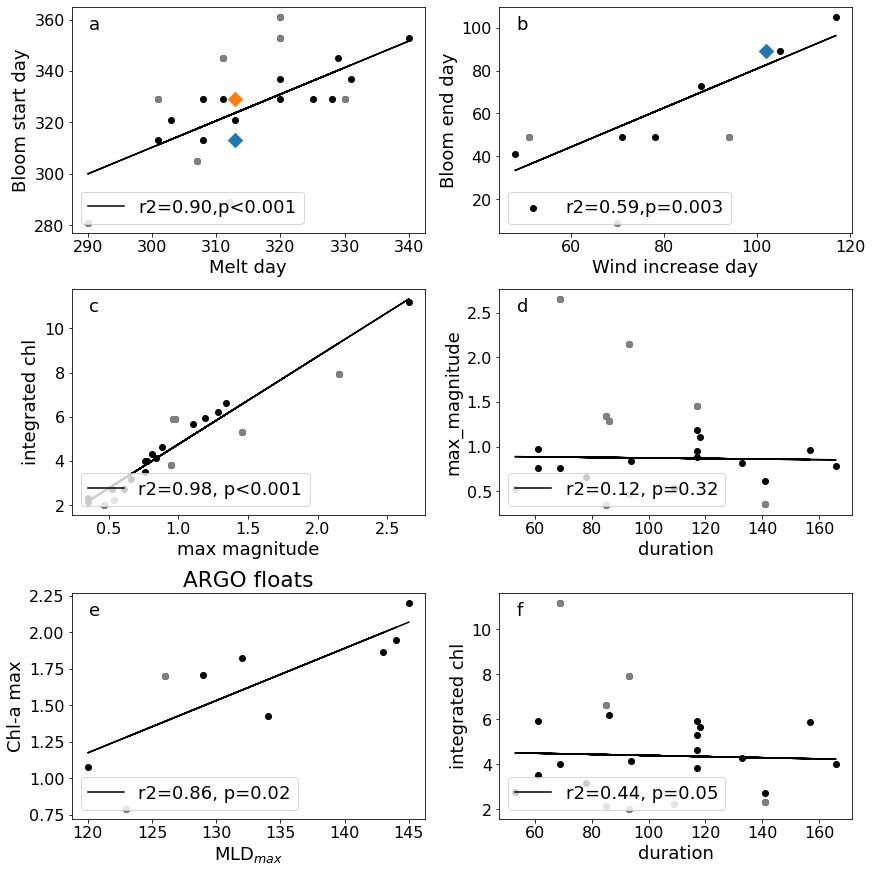

In [1801]:

# Try a different regression method

from sklearn.linear_model import TheilSenRegressor

# Supplementary Plots
# wind vs bloom end
# ice vs bloom start
# bloom duration vs magnitude
# chl magnitude vs integrated chl
# argo 1 mld vs chla 
# argo2 mld vs chla
fig,ax=plt.subplots(3,2,figsize=[12,12],constrained_layout=True)

ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]
ax5 = ax[2,0]
ax6 = ax[2,1]

###########

X=np.abs(ice_melt_day[:])
Y = np.array(
            bloom_start[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# reg = TheilSenRegressor()
# reg.fit(X,Y)

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

ax1.scatter(X,Y,c='k')
ax1.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')
ax1.scatter(ice_melt_day[-1],  bloom_start[-1],marker='D',s=100,c='tab:orange')
ax1.scatter(ice_melt_day[-2],  bloom_start[-2],marker='D',s=100,c='tab:blue')

ax1.plot(X,Y_pred,c='k',label='r2=0.90,p<0.001')
ax1.legend(loc='lower left')
ax1.set_xlabel('Melt day')
ax1.set_ylabel('Bloom start day')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])

# print(reg.score(X, Y))
print(linear_regressor.score(X[linear_regressor.outliers_==False][mask].reshape(-1,1),Y[linear_regressor.outliers_==False][mask].reshape(-1,1)))


# ###########
X=np.abs(wind_increase_day[:])
Y = np.array(
            bloom_end[:])

mask = ~np.isnan(X)&~np.isnan(Y)


X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

ax2.scatter(X,Y,label='r2=0.59,p=0.003',c='k')
ax2.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')
ax2.scatter(wind_increase_day[-1],bloom_end[-1],marker='D',s=100,c='tab:orange')
ax2.scatter(wind_increase_day[-2],bloom_end[-2],marker='D',s=100,c='tab:blue')

ax2.plot(X,Y_pred,c='k')
ax2.legend(loc='lower left')

ax2.set_xlabel('Wind increase day')
ax2.set_ylabel('Bloom end day')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])


################

X=np.abs(max_magnitude)
Y = np.array(
            int_chl)

mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

ax3.scatter(X,Y,c='k')
ax3.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')

ax3.plot(X,Y_pred,c='k',label='r2=0.98, p<0.001')

ax3.set_xlabel('max magnitude')
ax3.set_ylabel('integrated chl')
ax3.legend(loc='lower left')
mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])


################


X=np.abs(duration)
Y = np.array(
            max_magnitude)

mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)

Y_pred = linear_regressor.predict(X)

ax4.scatter(X,Y,c='k')
ax4.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')

ax4.plot(X,Y_pred,c='k',label='r2=0.12, p=0.32')

ax4.set_xlabel('duration')
ax4.set_ylabel('max_magnitude')
ax4.legend(loc='lower left')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])

################

from sklearn.linear_model import HuberRegressor, LinearRegression
from scipy.stats import pearsonr
mld_all=np.array([144., 134., 120., 132. ,143., 129., 126., 123., 145])
chl_all=np.array([0.64923665,0.47576578,0.35925467,0.60932444,.62082353,0.5703499,.56726012,0.2644591,0.73406226])

X=mld_all
Y = np.array(
            chl_all*3)

mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

ax5.set_title('ARGO floats')
ax5.scatter(X,Y,c='k')
ax5.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')

ax5.plot(X,Y_pred,c='k',label='r2=0.86, p=0.02')

ax5.set_xlabel('MLD$_{max}$')
ax5.set_ylabel('Chl-a max')
ax5.legend(loc='lower left')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])


# just note that there is an issue with some of the MLD calculations in the QC data/ I need to figure out how to reconcile the QC data with the netcdf data



####################


X=np.abs(duration)
Y = np.array(
            int_chl)

mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

ax6.scatter(X,Y,c='k')
ax6.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')

ax6.plot(X,Y_pred,c='k',label='r2=0.44, p=0.05')

ax6.set_xlabel('duration')
ax6.set_ylabel('integrated chl')
ax6.legend(loc='lower left')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])

################




ax1.text(0.05,0.9,'a',transform=ax1.transAxes)
ax2.text(0.05,0.9,'b',transform=ax2.transAxes)
ax3.text(0.05,0.9,'c',transform=ax3.transAxes)
ax4.text(0.05,0.9,'d',transform=ax4.transAxes)
ax5.text(0.05,0.9,'e',transform=ax5.transAxes)
ax6.text(0.05,0.9,'f',transform=ax6.transAxes)


# plt.savefig('../results/figures/supplemntary_regressions.png',dpi=150,bbox_inches='tight')

In [1509]:
ice_melt_day

array([319., 320., 321., 301., 300., 340., 302., 321., 327., 312., 313.,
       316., 315., 331., 327., 312., 311., 322., 319., 311., 306., 308.,
       313.])

In [1677]:
bloom_start[5]=350

0.3145916982734919
0.00536558394627628
0.807890985272823
2.9482580469713776e-05
0.31454732732241364
0.8011937444085173


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.3145916982734605


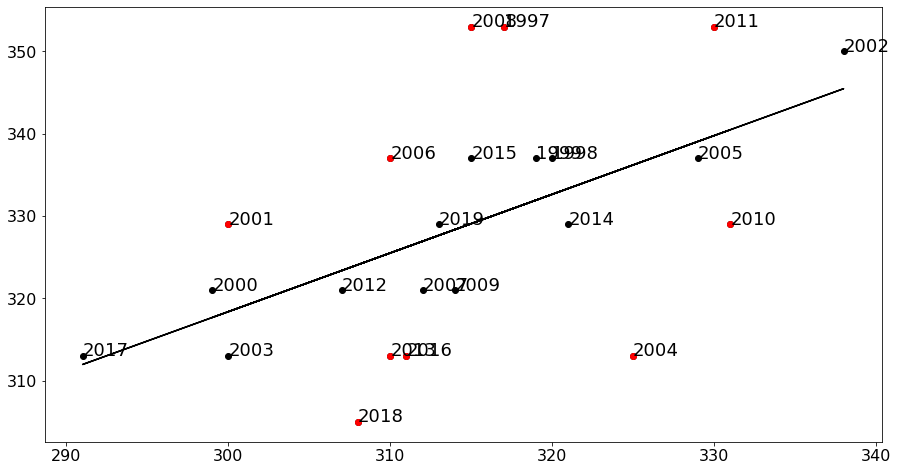

In [1678]:

X=np.abs(ice_melt_day[:])
Y = np.array(
            bloom_start[:])

mask = ~np.isnan(X)&~np.isnan(Y)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
# reg = TheilSenRegressor()
# reg.fit(X,Y)
# print(reg.score(X,Y))

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

fig = plt.figure(figsize=[15,8])

ax=fig.add_subplot()

ax.scatter(X,Y,c='k')
ax.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='red')

for i, txt in enumerate(years):
    ax.annotate(txt, (X[i], Y[i]))
ax.plot(X,Y_pred,c='k')

# ax.text(0.4,0.1,'r2=0.90, p<0.001',transform=ax.transAxes)

# ax.text(0.4,0.2,'r2=0.35, p=0.0024',transform=ax.transAxes)

# ax.legend(loc='lower left')
# ax1.set_xlabel('Melt day')
# ax1.set_ylabel('Bloom start day')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])

print(linear_regressor.score(X, Y))
print(linear_regressor.score(X[linear_regressor.outliers_==False][mask].reshape(-1,1),Y[linear_regressor.outliers_==False][mask].reshape(-1,1)))
reg=KernelReg(X,Y,'c')
print(reg.r_squared())

(array([1., 1., 0., 1., 4., 4., 8., 1., 2., 1.]),
 array([281. , 288.2, 295.4, 302.6, 309.8, 317. , 324.2, 331.4, 338.6,
        345.8, 353. ]),
 <BarContainer object of 10 artists>)

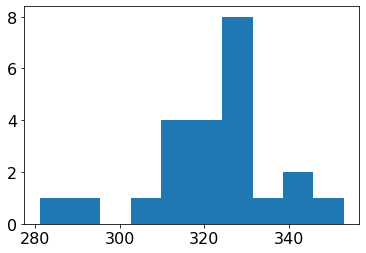

In [1504]:
plt.hist(Y)

(array([3., 1., 3., 5., 3., 4., 2., 1., 0., 1.]),
 array([300., 304., 308., 312., 316., 320., 324., 328., 332., 336., 340.]),
 <BarContainer object of 10 artists>)

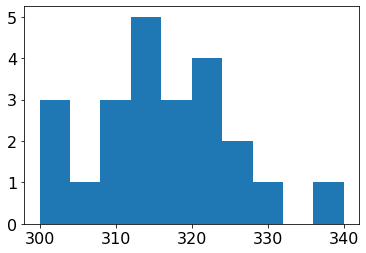

In [1506]:
plt.hist(X)

In [1397]:
ice_melt_day

array([323., 309., 322., 303., 303., 341., 302., 321., 330., 313., 313.,
       328., 315., 328., 328., 310., 309., 321., 321., 312., 291., 317.,
       314.])

In [1396]:
bloom_start

array([329., 329., 345., 321., 329., 353., 313., 313., 321., 329., 321.,
       305., 321., 329., 345., 305., 313., 329., 337., 289., 281., 313.,
       329.])

In [1201]:
from statsmodels.nonparametric.kernel_regression import KernelReg

reg=KernelReg(X,Y,'c')
reg.r_squared()

In [1507]:
reg=KernelReg(X,Y,'c')
reg.r_squared()

0.42134865087856455

In [1508]:
reg=KernelReg(X,Y,'c')
reg.r_squared()

0.42134865087856455

In [2324]:
years=np.arange(2011,2020,1)


In [2325]:
years.shape

(9,)

In [1399]:
wind_increase_day

array([115., 108., 102.,  97., 130., 105.,  79.,  56., 102., 101.,  92.,
       112.,  84., 131.,  59., 103.,  90.,  85.,  86., 110.,  75., 107.,
        86.])

In [1488]:
bloom_end[-3]=bloom_end[-3]+(5*8)

In [1482]:
bloom_end[max_magnitude>1.1*np.nanmean(max_magnitude)]=np.nan

In [1483]:
bloom_end

array([ 57.,  57.,  49.,  49.,  97.,  nan,  81.,  49.,  nan,  49.,  49.,
        81.,  nan, 105.,  49.,  nan,  nan,  97.,  89.,  89.,   9.,  89.,
        nan])

0.47637537479192826
0.03960391344512391
0.044949959497669556
0.3186297619042088


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


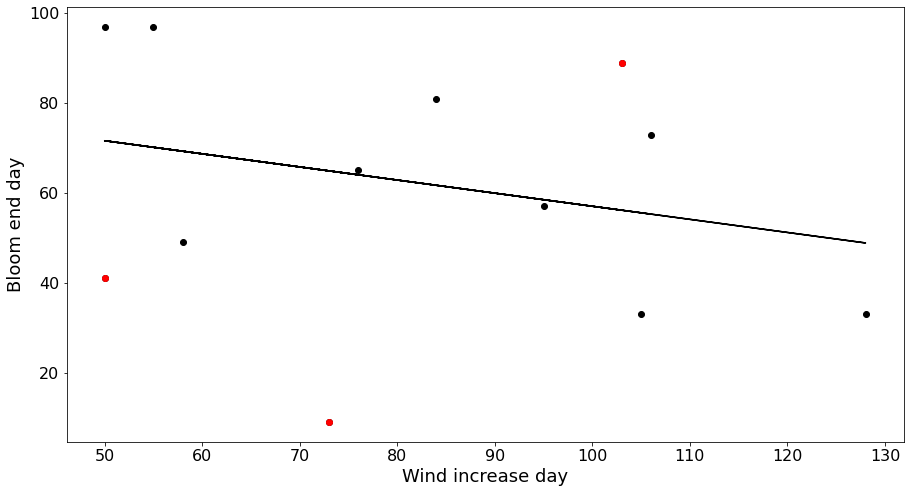

In [1679]:
X=np.abs(wind_increase_day[:])
Y = np.array(
            bloom_end[:])

mask = ~np.isnan(X)&~np.isnan(Y)


X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

fig = plt.figure(figsize=[15,8])

ax=fig.add_subplot()

ax.scatter(X,Y,c='k')
ax.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='red')

# for i, txt in enumerate(years):
#     ax.annotate(txt, (X[i], Y[i]))
# ax.scatter(wind_increase_day[-1],bloom_end[-1],marker='D',s=100,c='tab:orange')
# ax.scatter(wind_increase_day[-2],bloom_end[-2],marker='D',s=100,c='tab:blue')

ax.plot(X,Y_pred,c='k')
# ax2.legend(loc='lower left')

ax.set_xlabel('Wind increase day')
ax.set_ylabel('Bloom end day')

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[linear_regressor.outliers_==False][mask]))[1])
print(linear_regressor.score(X, Y))
print(linear_regressor.score(X[linear_regressor.outliers_==False][mask].reshape(-1,1),Y[linear_regressor.outliers_==False][mask].reshape(-1,1)))


(array([7., 2., 0., 0., 0., 2., 0., 3., 2., 1.]),
 array([ 49. ,  54.6,  60.2,  65.8,  71.4,  77. ,  82.6,  88.2,  93.8,
         99.4, 105. ]),
 <BarContainer object of 10 artists>)

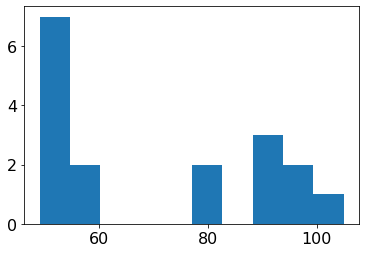

In [1492]:
plt.hist(Y)

In [1514]:
reg=KernelReg(X,Y,'c')
reg.r_squared()

0.1300223253353328

In [1215]:
 duration[-3]=np.nan

0.026535452174297803
0.5779253372935079


/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


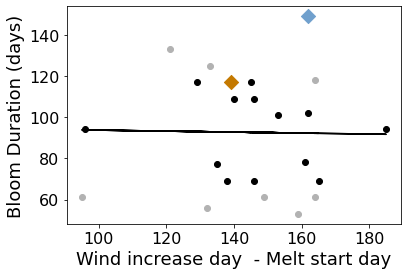

In [1680]:
X=np.abs(good_period)
# X = np.array(dom[:-1])
Y = np.array(
           duration[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.2)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

# plt.scatter(X,Y,c=max_magnitude*2,cmap=cmo.algae,vmin=1,vmax=3.2)
# plt.colorbar()
fig = plt.figure()

axes=fig.add_subplot()

axes.scatter(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False],color=black)
axes.scatter(X[linear_regressor.outliers_==True],Y[:][linear_regressor.outliers_==True],color=grey)

axes.scatter(good_period[-1],duration[-1],marker='D',s=100,color=orange)
axes.scatter(good_period[-2],duration[-2],marker='D',s=100,color=lightblue)

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
axes.plot(X,Y_pred,c='k',label='r$^2$=0.50, p=0.015')

axes.set_xlabel('Wind increase day  - Melt start day')
axes.set_ylabel('Bloom Duration (days)')
# axes3.legend(frameon=False)

# print(linear_regressor.outliers_)
# print(linear_regressor.coef_)

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False]))

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])




0.6587831654097566
0.007898715473641299
0.6587831654097563


Text(0.4, 0.1, 'r$^2$ = 0.66, p = 0.007')

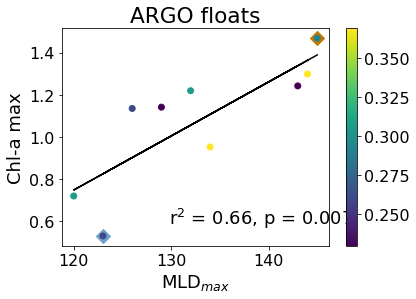

In [536]:
mld_all=np.array([144., 134., 120., 132. ,143., 129., 126., 123., 145])
chl_all=(np.array([0.64923665,0.47576578,0.35925467,0.60932444,.62082353,0.5703499,.56726012,0.2644591,0.73406226]))

X=mld_all
Y = np.array(
            chl_all*2)

mask = ~np.isnan(X)&~np.isnan(Y)

print(pearsonr(X,Y)[0]**2)
print(pearsonr(X,Y)[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

# linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
print(linear_regressor.score(X,Y))
Y_pred = linear_regressor.predict(X)
fig = plt.figure()

axes=fig.add_subplot()

axes.set_title('ARGO floats')
axes.scatter(mld_all[-1],chl_all[-1]*2,s=100,color=orange,marker='D')
axes.scatter(mld_all[-2],chl_all[-2]*2,s=100,color=lightblue,marker='D')
cs=axes.scatter(X,Y,c=iceindA)
plt.colorbar(cs)
# axes.scatter(X[linear_regressor.outliers_],Y[:][linear_regressor.outliers_],c='grey')

axes.plot(X,Y_pred,c='k',label='r2=0.86, p=0.02')

axes.set_xlabel('MLD$_{max}$')
axes.set_ylabel('Chl-a max')
# axes.legend(loc='lower left')
# 
axes.text(0.4,0.1,'r$^2$ = 0.66, p = 0.007',transform=axes.transAxes)

# mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

# print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
# print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])



<!-- ### plt.hist((icecover)) -->

0.6553467015500843
0.008196119632257555


Text(0.4, 0.1, 'r$^2$ = 0.66, p = 0.008')

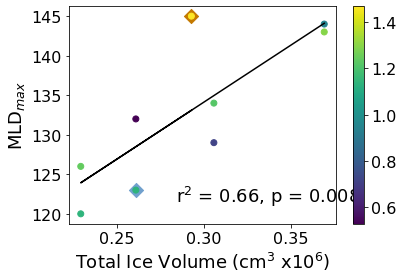

In [540]:

mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together



iceindA= np.repeat(iceind[:,-3:,-20:-5].values.sum(1).sum(1),2)[-10:-1]/1e6


# max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
# max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019

Y=np.array(mld_all)
X = np.array(iceindA)
mask = ~np.isnan(X)&~np.isnan(Y)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
# print(linear_regressor.score(X,Y))
fig=plt.figure()
axes=fig.add_subplot()

# axes.scatter(iceindA[-5:-1],mld2[:],color=black)
# axes.scatter(iceindA[-5:],mld1[:],color=black)

axes.scatter(iceindA[-1],mld1[-1],s=100,color=orange,marker='D')
axes.scatter(iceindA[-2],mld1[-2],s=100,color=lightblue,marker='D')
cs=axes.scatter(iceindA,mld_all,c=chl_all*2)
plt.colorbar(cs)

axes.plot(X,Y_pred,c='k',label='r$^2$=0.72, p=0.003')
# axes.legend(loc=4,frameon=False) 
axes.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)' )
axes.set_ylabel('MLD$_{max}$')

axes.text(0.4,0.1,'r$^2$ = 0.66, p = 0.008',transform=axes.transAxes)


In [2078]:



Y=np.array(max_magnitude[-9:]*2)

X = np.array(total_icecover)
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.2)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)



axes4.scatter(X,Y,color=black)
axes4.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],color=grey)
axes4.scatter(X[-1],  Y[-1],marker='D',s=100,color=orange)
axes4.scatter(X[-2],  Y[-2],marker='D',s=100,color=lightblue)
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')
linear_regressor.score(X,Y)
axes4.plot(X,Y_pred,c='k',label='r$^2$=0.93, p=0.034')

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))

# print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[0]**2)
# print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[1])

axes4.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)')
axes4.set_ylabel('[Chl-a] mg m$^{-3}$')
axes4.legend(frameon=False)


reg=KernelReg(X,Y,'c')
print(reg.r_squared())
########

mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together


# mld_all=np.array([106,  96, 120, 122, 132, 130, 100,  102, 124])


iceind=np.repeat(total_icecover_outliers,2)[-10:-1]


# max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
# max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019
wer
Y=np.array(mld_all)
X = np.array(iceind)
mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

axes5.scatter(total_icecover_outliers[-5:-1],mld2[:],color=black)
axes5.scatter(total_icecover_outliers[-5:],mld1[:],color=black)

axes5.scatter(total_icecover_outliers[-1],mld1[-1],s=100,color=orange,marker='D')
axes5.scatter(total_icecover_outliers[-2],mld1[-2],s=100,color=lightblue,marker='D')

axes5.plot(X,Y_pred,c='k',label='r$^2$=0.72, p=0.003')
axes5.legend(loc=4,frameon=False) 
axes5.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)' )
axes5.set_ylabel('MLD$_{max}$')
reg=KernelReg(X,Y,'c')
print(reg.r_squared())

/opt/anaconda3/envs/data/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7428489976793812
0.7278541366009154


In [477]:
# Supplementary Plots
# wind vs bloom end
# ice vs bloom start
# bloom duration vs magnitude
# chl magnitude vs integrated chl
# argo 1 mld vs chla 
# argo2 mld vs chla




fig,ax=plt.subplots(3,2,figsize=[12,],constrained_layout=True)
#####################################
# Regression plots

axes3 = ax[0]
axes4 = ax[1]
axes5 = ax[2]


X=np.abs(good_period)
# X = np.array(dom[:-1])
Y = np.array(
           duration[:])

mask = ~np.isnan(X)&~np.isnan(Y)

# print((pearsonr(X[mask],Y[mask]))[0]**2)
# print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.2)
# linear_regressor = LinearRegression()

linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

# plt.scatter(X,Y,c=max_magnitude*2,cmap=cmo.algae,vmin=1,vmax=3.2)
# plt.colorbar()

axes3.scatter(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False],color=black)
axes3.scatter(X[linear_regressor.outliers_==True],Y[:][linear_regressor.outliers_==True],color=grey)

axes3.scatter(good_period[-1],duration[-1],marker='D',s=100,color=orange)
axes3.scatter(good_period[-2],duration[-2],marker='D',s=100,color=lightblue)

# plt.scatter(dom[:-1],chl.duration,c=chl.chlmax,cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
# plt.scatter(wind_increase,duration[-20:])#,c=chl.chlmax[-20:],cmap=plt.cm.RdBu_r,s=100,vmin=0,vmax=1.3)
axes3.plot(X,Y_pred,c='k',label='r$^2$=0.5, p=0.007')

axes3.set_xlabel('Wind increase day  - Melt start day')
axes3.set_ylabel('Bloom Duration (days)')
axes3.legend(frameon=False)

# print(linear_regressor.outliers_)
# print(linear_regressor.coef_)

print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[:][linear_regressor.outliers_==False]))

mask = ~np.isnan(X[linear_regressor.outliers_==False])&~np.isnan(Y[:][linear_regressor.outliers_==False])

print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False][mask],Y[:][linear_regressor.outliers_==False][mask]))[1])




##########




Y=np.array(max_magnitude[-9:])

X = np.array(total_icecover)
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)



axes4.scatter(X,Y,color=black)
axes4.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],color=grey)
axes4.scatter(X[-1],  Y[-1],marker='D',s=100,color=orange)
axes4.scatter(X[-2],  Y[-2],marker='D',s=100,color=lightblue)
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')
linear_regressor.score(X,Y)
axes4.plot(X,Y_pred,c='k',label='r$^2$=0.67, p=0.028')

print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))

print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[1])

axes4.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)')
axes4.set_ylabel('[Chl-a] mg m$^{-3}$')
axes4.legend(frameon=False)



########

mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together

iceind=np.repeat(total_icecover_outliers,2)[-10:-1]


max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019

Y=np.array(mld_all)
X = np.array(iceind)
mask = ~np.isnan(X)&~np.isnan(Y)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

axes5.scatter(total_icecover_outliers[-5:-1],mld2[:],color=black)
axes5.scatter(total_icecover_outliers[-5:],mld1[:],color=black)

axes5.scatter(total_icecover_outliers[-1],mld1[-1],s=100,color=orange,marker='D')
axes5.scatter(total_icecover_outliers[-2],mld1[-2],s=100,color=lightblue,marker='D')

axes5.plot(X,Y_pred,c='k',label='r$^2$=0.72, p=0.003')
axes5.legend(loc=4,frameon=False) 
axes5.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)' )
axes5.set_ylabel('MLD$_{max}$')

# plt.savefig('../results/figures/figure2b.png',transparent=True,dpi=150,bbox_inches='tight')

TypeError: from_bounds() missing 1 required positional argument: 'height'

In [1013]:
# ice_melt_day.mean()

# wind_increase_day.mean()
print(bloom_start.mean())
print(bloom_end.mean())

322.2
67.4


In [1014]:
ice_melt_day_since=(((ice_melt_day[:]+ 180) %365)-180)
wind_increase_day_since = (((wind_increase_day[:]+ 180) %365)-180)
bloom_start_day_since = (((bloom_start[:]+ 180) %365)-180)
bloom_end_day_since = (((bloom_end[:]+ 180) %365)-180)


<ipython-input-2148-799f7fefaf84>:153: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels([''])
<ipython-input-2148-799f7fefaf84>:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels([''])


Text(0.01, 0.9, 'e')

/opt/anaconda3/envs/data/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


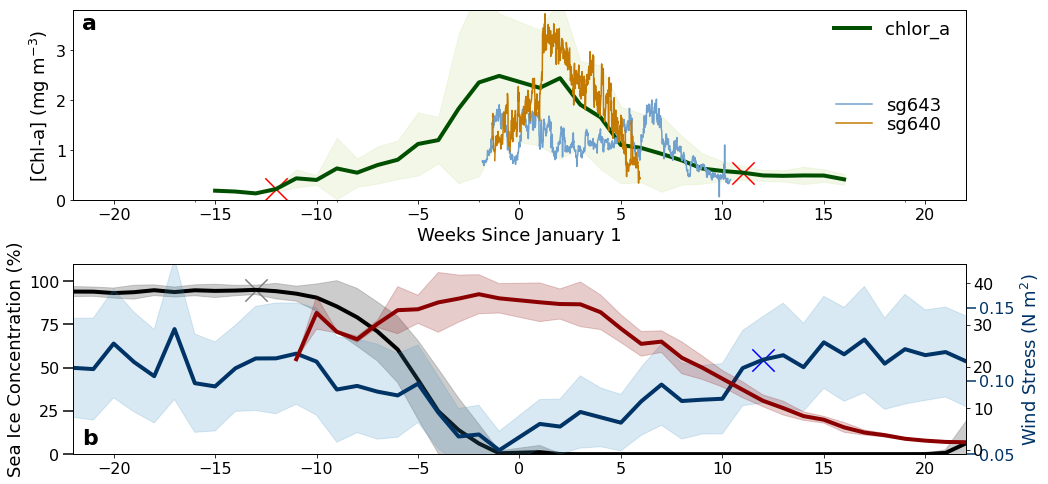

In [2148]:
import matplotlib 
import seaborn as sns
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})

import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=[16,14],constrained_layout=True)
gs = gridspec.GridSpec(3, 3,wspace=0.4,hspace=0.3,height_ratios =(0.3,0.3,0.4))
ax = plt.subplot(gs[1, :])



max_ice = ice_climatology.ice_conc.max()
max_ind = np.array(([ice_climatology.ice_conc==max_ice])).argmax()
prepeak_max = ice_climatology.ice_conc[:max_ind+1].max()
postpeak_max = ice_climatology.ice_conc[max_ind:].max()
prepeak_subset = ice_climatology.iloc[0:max_ind+1]
postpeak_subset = ice_climatology.iloc[max_ind:len(ice_climatology.ice_conc)]

termination=postpeak_subset.index[(postpeak_subset.ice_conc.values>postpeak_min+(0.8*(max_ice-postpeak_min)))][0]



ice_climatology.ice_conc.plot(ax=ax,c=black,lw=4)
# ice_climatology.ice_conc.plot(ax=ax,c=black,lw=4)
ax.fill_between(ice_climatology.index,ice_climatology.ice_conc- ice_climatology.variance, ice_climatology.ice_conc + ice_climatology.variance, alpha=0.4,color=black_shade) 


# ax.axvline(termination,c='grey',ls='--')
ax.scatter(termination,(ice_climatology.ice_conc).iloc[ice_climatology.index==termination],marker='x',s=500,c='grey')


ax11=ax.twinx()

min_wind = wind_climatology.tau.min()
min_ind = np.array(([wind_climatology.tau==min_wind])).argmax()

prepeak_max = wind_climatology[:min_ind+1].max()
postpeak_max = wind_climatology[min_ind:].max()
prepeak_subset = wind_climatology.iloc[0:min_ind+1]
postpeak_subset = wind_climatology.iloc[min_ind:len(wind_climatology.tau)]
termination=postpeak_subset.index[(postpeak_subset.tau>1.1*postpeak_subset.tau.mean())][0]

wind_climatology.tau.plot(ax=ax11,c=darkblue,lw=4)
ax11.fill_between(wind_climatology.index,wind_climatology.tau- wind_climatology.variance/3, wind_climatology.tau + wind_climatology.variance/3, alpha=0.2,color=darkblue_shade) 

# ax11.axvline(termination,c='blue',ls='--')

ax11.scatter(termination,(wind_climatology.tau).iloc[wind_climatology.index==termination],marker='x',s=500,c='blue')

#######################################


ax11.yaxis.tick_right()

ax11.spines["right"].set_position(("axes", 1))
ax11.spines["left"].set_visible(True)
ax.yaxis.label.set_color(black)
ax11.yaxis.label.set_color(darkblue)



tkw = dict(size=10, width=1.5)
ax11.tick_params(axis='y', colors=darkblue, **tkw)

ax.tick_params(axis='y', colors=black, **tkw)

ax11.tick_params(axis='y', colors=darkblue, **tkw)
ax.set_ylim(0,110)
ax11.set_ylim(0.05,0.18)
ax.set_ylabel('Sea Ice Concentration (%)')

ax11.set_ylabel('Wind Stress (N m$^2$)')

ax.set_xlabel('')


ax11.set_xlim(-22,22)
#######################################
# ax22=ax.twinx()

# (chl_climatology.chlor_a*3).plot(ax=ax22,c=darkgreen,lw=4)
# ax22.fill_between(chl_climatology.index,chl_climatology.chlor_a*3- chl_climatology.variance*3, chl_climatology.chlor_a*3 + chl_climatology.variance*3, alpha=0.4,color=darkgreen_shade) 

# ax22.axvline(chl_climatology.index[chl_climatology.chlor_a==chl_climatology.chlor_a.max()],c='k')

apex_ind = np.array(([chl_climatology.chlor_a==chl_climatology.chlor_a.max()])).argmax()
prepeak_min = chl_climatology.chlor_a[:apex_ind+1].min()
postpeak_min = chl_climatology.chlor_a[apex_ind:].min()
prepeak_subset = chl_climatology.iloc[0:apex_ind+1]
postpeak_subset = chl_climatology.iloc[apex_ind:len(chl_climatology.chlor_a)]
initiation=prepeak_subset.index[(prepeak_subset.chlor_a<prepeak_min+(0.05*(maxchl-prepeak_min)))][-1]
termination=postpeak_subset.index[(postpeak_subset.chlor_a<postpeak_min+(0.05*(maxchl-postpeak_min)))][0]

# ax22.axvline(termination,c='red',ls='--')
# ax22.axvline(initiation,c='green',ls='--')

# ax22.set_xlim(-26,28)


ax22 = ax.twinx()

par_climatology.par.plot(ax=ax22,c='darkred',lw=4)
ax22.fill_between(par_climatology.index,par_climatology.par- par_climatology.variance, par_climatology.par + par_climatology.variance, alpha=0.2,color="darkred") 

#####################################

axes2 = plt.subplot(gs[0, :])
# (chlpivot.T.mean()*3).plot(c=darkgreen,ax=axes2,lw=4,label='OC-CCI')
# axes2.fill_between(chlpivot.index,(chlpivot.T.mean()*3)- (chlpivot.T*3).std(), (chlpivot.T.mean()*3) + (chlpivot.T*3).std() , alpha=0.4,color=darkgreen_shade) 



(chl_climatology.chlor_a*3).plot(ax=axes2,c=darkgreen,lw=4)
axes2.fill_between(chl_climatology.index,chl_climatology.chlor_a*3- chl_climatology.variance*3, chl_climatology.chlor_a*3 + chl_climatology.variance*3, alpha=0.4,color=darkgreen_shade) 
# axes2.axvline(termination,c='red',ls='--')
# axes2.axvline(initiation,c='green',ls='--')

# axes2.text(0.2,0.06,'CHL-A', transform=axes2.transAxes,fontsize=26,c=darkgreen)
# axes2.legend(bbox_to_anchor=(0., 0.06, 1., .98),frameon=False)


# axes2.plot(month_name,argo1_clim)
# axes2.plot(argo1_clim.index,argo1_clim,color=darkgreen,ls='dashdot',label='4397',lw=2)
# axes2.plot(argo2_clim.index,argo2_clim,color=darkgreen,ls='dotted',label='4467',lw=2)
axes2.legend(bbox_to_anchor=(0., 0.05, 1., .98),frameon=False)

axes2.set_ylabel('[Chl-a] (mg m$^{-3}$)')
axes2.set_xlim(-22,22)
axes2.set_xlabel('Weeks Since January 1')


import matplotlib.dates as mdates
fmt_week = mdates.WeekdayLocator()
fmt_month = mdates.MonthLocator()


ax4=axes2.twiny()
ax4.plot(gl2018,c=lightblue,label='sg643')
ax4.set_xlim('2018-07-01','2019-06-30')
ax4.set_ylim(0,3.5)
ax4.legend(bbox_to_anchor=(0.001, 0.05, 0.99, .58),frameon=False)


ax5=axes2.twiny()
ax5.plot(gl2019[560:],c=orange,label='sg640')
ax5.set_xlim('2019-07-01','2020-06-30')
ax5.set_ylim(0,3.8)
ax5.legend(bbox_to_anchor=(0.001, 0.05, 0.99, .48),frameon=False)

ax5.set_xticklabels([''])
ax4.set_xticklabels([''])
ax4.xaxis.set_major_locator(fmt_week)
ax5.xaxis.set_major_locator(fmt_week)
axes2.xaxis.set_minor_locator(fmt_week)
# axes2.xaxis.set_major_locator(fmt_month)


axes2.scatter(termination,(chl_climatology.chlor_a*3).iloc[chl_climatology.index==termination],marker='x',s=500,c='r')
axes2.scatter(initiation,(chl_climatology.chlor_a*3).iloc[chl_climatology.index==initiation],marker='x',s=500,c='r')


### ADD figure labels

ax.text(0.01,0.05,'b',transform=ax.transAxes,fontsize=22, weight='bold')
axes2.text(0.01,0.9,'a',transform=axes2.transAxes,fontsize=22, weight='bold')
axes3.text(0.01,0.9,'c',transform=axes3.transAxes,fontsize=22, weight='bold')
axes4.text(0.01,0.9,'d',transform=axes4.transAxes,fontsize=22, weight='bold')
axes5.text(0.01,0.9,'e',transform=axes5.transAxes,fontsize=22, weight='bold')


# plt.savefig('../results/figures/figure2.png',transparent=True,dpi=150,bbox_inches='tight')

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xarray/core/accessor_dt.py:378: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


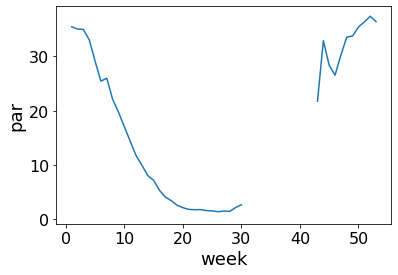

In [2137]:
par.groupby('time.week').mean(dim='time').par.plot()

In [ ]:



Y=np.array(max_magnitude[-9:])

X = np.array(total_icecover)
mask = ~np.isnan(X)&~np.isnan(Y)

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = HuberRegressor(epsilon=1.35)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)



axes4.scatter(X,Y,color=black)
axes4.scatter(X[linear_regressor.outliers_],Y[linear_regressor.outliers_],color=grey)
axes4.scatter(X[-1],  Y[-1],marker='D',s=100,color=orange)
axes4.scatter(X[-2],  Y[-2],marker='D',s=100,color=lightblue)
# plt.scatter(total_icecover_outliers,max_magnitude_outliers[-9:]*2,s=50,color=grey_shade,marker='x')
print('simple',linear_regressor.score(X,Y))
axes4.plot(X,Y_pred,c='k',label='r$^2$=0.93, p=0.034')

# print(linear_regressor.score(X[linear_regressor.outliers_==False],Y[linear_regressor.outliers_==False]))

print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[0]**2)
print((pearsonr(X[linear_regressor.outliers_==False].squeeze(),Y[linear_regressor.outliers_==False].squeeze()))[1])

axes4.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)')
axes4.set_ylabel('[Chl-a] mg m$^{-3}$')
axes4.legend(frameon=False)



########

mld_all = np.array([143,144,129,134,126,120,123,132,145])  # added the two floats together


# mld_all=np.array([106,  96, 120, 122, 132, 130, 100,  102, 124])


iceind=np.repeat(total_icecover_outliers,2)[-10:-1]


# max1=np.array([2.06, 1.9440, 1.915, 2.532, 2.91]) #2016, 201, 2018 ,2019 , 2020
# max2=np.array([2.6363,5.004, 4.3736, 2.0686, 3.4798])[1:] # dont have winter MLD for 2014-2015 ,2016,2017,2018,2019

Y=np.array(mld_all)
X = np.array(iceind)
mask = ~np.isnan(X)&~np.isnan(Y)

print((pearsonr(X[mask],Y[mask]))[0]**2)
print((pearsonr(X[mask],Y[mask]))[1])

X= X[mask].reshape(-1,1)
Y =Y[mask].reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
# print(linear_regressor.score(X,Y))

axes5.scatter(total_icecover_outliers[-5:-1],mld2[:],color=black)
axes5.scatter(total_icecover_outliers[-5:],mld1[:],color=black)

axes5.scatter(total_icecover_outliers[-1],mld1[-1],s=100,color=orange,marker='D')
axes5.scatter(total_icecover_outliers[-2],mld1[-2],s=100,color=lightblue,marker='D')

axes5.plot(X,Y_pred,c='k',label='r$^2$=0.72, p=0.003')
axes5.legend(loc=4,frameon=False) 
axes5.set_xlabel('Total Ice Volume (cm$^3$ x10$^6$)' )
axes5.set_ylabel('MLD$_{max}$')

